**Autor:** Dávid Dráb  <br> *[Prírodovedecká fakulta](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), Univerzita Pavla Jozefa Šafárika, Košice 2023* <br> email: [david.drab163@gmail.com](mailto:david.drab163@gmail.com).
***
**<font size=6.5 color=darkgreen> Funkcionálny regresný model I </font>**  

--- 
<a id=obsah></a>

**<font size=5.5 color=darkgreen> Obsah </font>** <br>
1. [<font color=darkgreen> Úvod](#uvod)
    
    
2.  [<font color=darkgreen> Regresia so skalárnou odozvou a funkcionálnymi regresormi](#SnF)
    
    
3.  [<font color=darkgreen> Regresia s funkcionálnou odozvou a skalárnymi regresormi](#FnS)
    
    
4.  [<font color=darkgreen> Regresia s funkcionálnou odozvou a funkcionálnymi regresormi](#FnF)
    
 
5.  [<font color=darkgreen> Zdroje](#References)

--- 
<a id=uvod></a>
**<font size=5 color=darkgreen> 1. Úvod </font>** <br>

**<font size=4 color=darkgreen> 1.1 Od klasického k funkcionálnemu regresnému modelu </font>** <br>

Klasické prístupy lineárnej regresie, analýzy rozptylu a lineárneho modelovania
skúmajú spôsob, akým môže byť rozptyl pozorovaných údajov vysvetlený
inými známymi alebo pozorovanými premennými. **Klasický** lineárny model má tvar 

$$ y_i = x_{i1}\beta_1 + x_{i2}\beta_2 + ... + x_{ip}\beta_p +\epsilon_i, \qquad i = 1,2,...,N, $$

kde všetky premenné $\epsilon_i$, regresory $x_{ik}$ a parametre $\beta_i$ sú skaláry.

Funkcionálne regresné modely môžeme rozdeliť do troch veľkých skupín, v závislosti od toho, či **odozvy** (vysvetľované, závislé premenné) alebo **regresory** (vysvetľujúce, nezávislé premenné) alebo oboje predstavujú **krivky** (funkcie) a tiež predpokladáme, že odozvy a regresory majú nulový priemer.

* Regresia so **skalárnou** odozvou a **funkcionálnymi** regresormi (SnF)

$$ 	Y_i = \int \beta(s) X_i(s) ds + \epsilon_i. $$

* Regresia s **funkcionálnou** odozvou a **skalárnymi** regresormi (FnS)

$$ Y_i(t) = \sum_{k=1}^{p} x_{ik}\beta_k(t) + \epsilon_i(t). $$

* Regresia s **funkcionálnou** odozvou a **funkcionálnymi** regresormi (FnF)

$$ Y_i(t) =  \int \beta(t,s) X_i(s) ds + \epsilon_i(t). $$

Pomocou tohto funkcionálneho modelu, vieme matematicky modelovať rôzne reálne situácie. Jednu z nich si bližšie uvedieme v nasledujúcom príklade. 

V prípade geograficky rozľahlej krajiny (napr. Kanada, Čína), vieme jej meteorologické stanice rozdeliť (napr. pomocou (F)PCA) do 4 geografických kategórií: atlantická, tichomorská, kontinentálna a arktická. Môžme sa pýtať:

*  Akým spôsobom **geografická (klimatická) kategória** charakterizuje **teplotný profil**? (model SnF)


* Je možné modelovať **celkový ročný úhrn zrážok** na meteorologickej stanici pomocou jej **ročného teplotného profilu**? (model FnS)


*  Môžeme modelovať **ročný zrážkový profil** meteorologickej stanice pomocou jej **teplotného profilu**? (model FnF)

Rozdiel medzi klasickým a funkcionálnym regresný modelom si ukážeme na populačnej verzii regresného modelu, t.j. 

$$ 	Y = \sum_{i=1}^{p} \beta_i X_i + \epsilon, $$

pričom $\left[ X_1,X_2,...,X_p,\epsilon\right]$ je náhodný vektor. Hľadáme $\beta$, ktorá minimalizuje 

$$ 	R(\beta) = E \left( Y-\sum_{i=1}^{p} \beta_i X_i \right)^2. $$

Minimum nájdeme pomocou parciálnej derivácie $\partial R(\beta)/\partial \beta_l$, ktorú položíme nule pre každé $l=1,2,...,p$. Pre funkcionálnu verziu modelu potrebujeme nájsť minimum v každom bode funkcie $\beta(t)$, čo je ťažké, pretože tých bodov je nekonečne veľa (sústava nekonečne veľa rovníc je ťažko riešiteľná). Tento problém vieme odstrániť:

* **Bázickým rozvojom funkcie** $\beta(t)$,
t.j. $$\beta(t) = \sum_{k=1}^{K} c_kB_k(t).$$


* **Penalizáciou odhadu funkcie** $\beta(t)$,
kde hľadáme optimálnu hodnotu $\lambda$ penalizovaného reziduálneho súčtu štvorcov

$$ P_{\lambda}(\alpha,\beta) = \sum_{i=1}^{N}\left[Y_i -\alpha -\int z_i(s)\beta(s)ds \right]^2 + \lambda\int\left[ L\beta(s)\right]^2ds,$$ 

kde za diferenciálny operátor berieme druhú deriváciu, t.j. $(L\beta)(t) = \beta''(t).$



* **Odhadom funkcie** $\beta(t)$ **pomocou funkcionálnych hlavných komponentov,**
kde využijeme aproximácie 

$$X_i(t) \approx \hat{\mu}(t) + \sum_{j=1}^{p} \hat{\xi}_{ij}\hat{v}_j(t)\qquad a \qquad \hat{\xi}_{ij} = \int \left[ X_i(t) - \hat{\mu}(t) \right]\hat{v}_j(t)dt.$$ 

Model sa teda redukuje na 
\begin{split}
		Y_i
		& = \alpha + \int\beta(t) \left( \hat{\mu}(t)+\sum_{j=1}^{p}\hat{\xi}_{ij}\hat{v}_j(t)\right) dt +\epsilon_i, \\
		& = \beta_0 +\sum_{j=1}^{p}\hat{\xi}_{ij}\beta_j + \epsilon_i,
	\end{split}
kde
$$ \beta_0 = \alpha + \int \beta(t)\hat{\mu}(t)dt \qquad a \qquad \beta_j = \int \beta(t)\hat{v}_j(t)dt$$

sa považujú za neznáme parametre. Inak povedané, za regresory vezmeme skóre vybraných komponentov. 

Viac detailov nájdeme napr. v 4. a 5. kapitole u Kokoszku a Reimherra (2017).

**<font size=4 color=darkgreen> 1.2 Popis skúmaných dát </font>** <br>

V prostredí programu R nájdeme balík *fda* (Ramsay a kol., 2022), ktorý obsahuje dáta o ročnom priebehu dennej teploty a množstvu zrážok v 35 mestách Kanady. Tieto údaje sú priemernými dennými teplotami a priemerným denným množstvom zrážok medzi rokmi 1960 až 1994.     

In [326]:
options(warnings=-1)
# inicializacia potrebnych balikov
suppressMessages(library("fda", quietly = TRUE, verbose = FALSE))
suppressMessages(library("refund", quietly = TRUE, verbose = FALSE))
suppressMessages(library("heplots", quietly = TRUE, verbose = FALSE))
#suppressMessages(library("plot3D", quietly = TRUE, verbose = FALSE))
suppressMessages(library("RVAideMemoire", quietly = TRUE, verbose = FALSE))

In [214]:
# na vyladenie dat pouzijeme fourierovu bazu a 65 funkcii v nej
daybasis65 <- create.fourier.basis(rangeval=c(0, 365), nbasis=65)
linearny_diff_operator <- vec2Lfd(c(0,(2*pi/365)^2,0), c(0, 365))

# pracujeme s datami, ktore maju nulove priemery!! 
daytempfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"Temperature.C"]
                          -rowMeans(CanadianWeather$dailyAv[,,"Temperature.C"]),
                          daybasis65, fdnames=list("deň", "stanica", "stupeň Celzia"))$fd
# data s nenulovym priemerov pre lepsie zobrazenie
daytempfd2 <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"Temperature.C"],
                          daybasis65, fdnames=list("deň", "stanica", "stupeň Celzia"))$fd
dayprecfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"log10precip"]
                          -rowMeans(CanadianWeather$dailyAv[,,"log10precip"]),
                          daybasis65, fdnames=list("deň", "stanica", "zrážky v log10(mm)"))$fd

V nasledujúcich dvoch grafoch si vykreslíme už vyhladené teplotné krivky a logaritmické zrážkové profily.  Podľa Ramsaya a kol. (2009) sme použili **65 funkcií v báze** a vzhľadom na existenciu periódy sme využili **fourierovu bázu**.  

[1] "done"

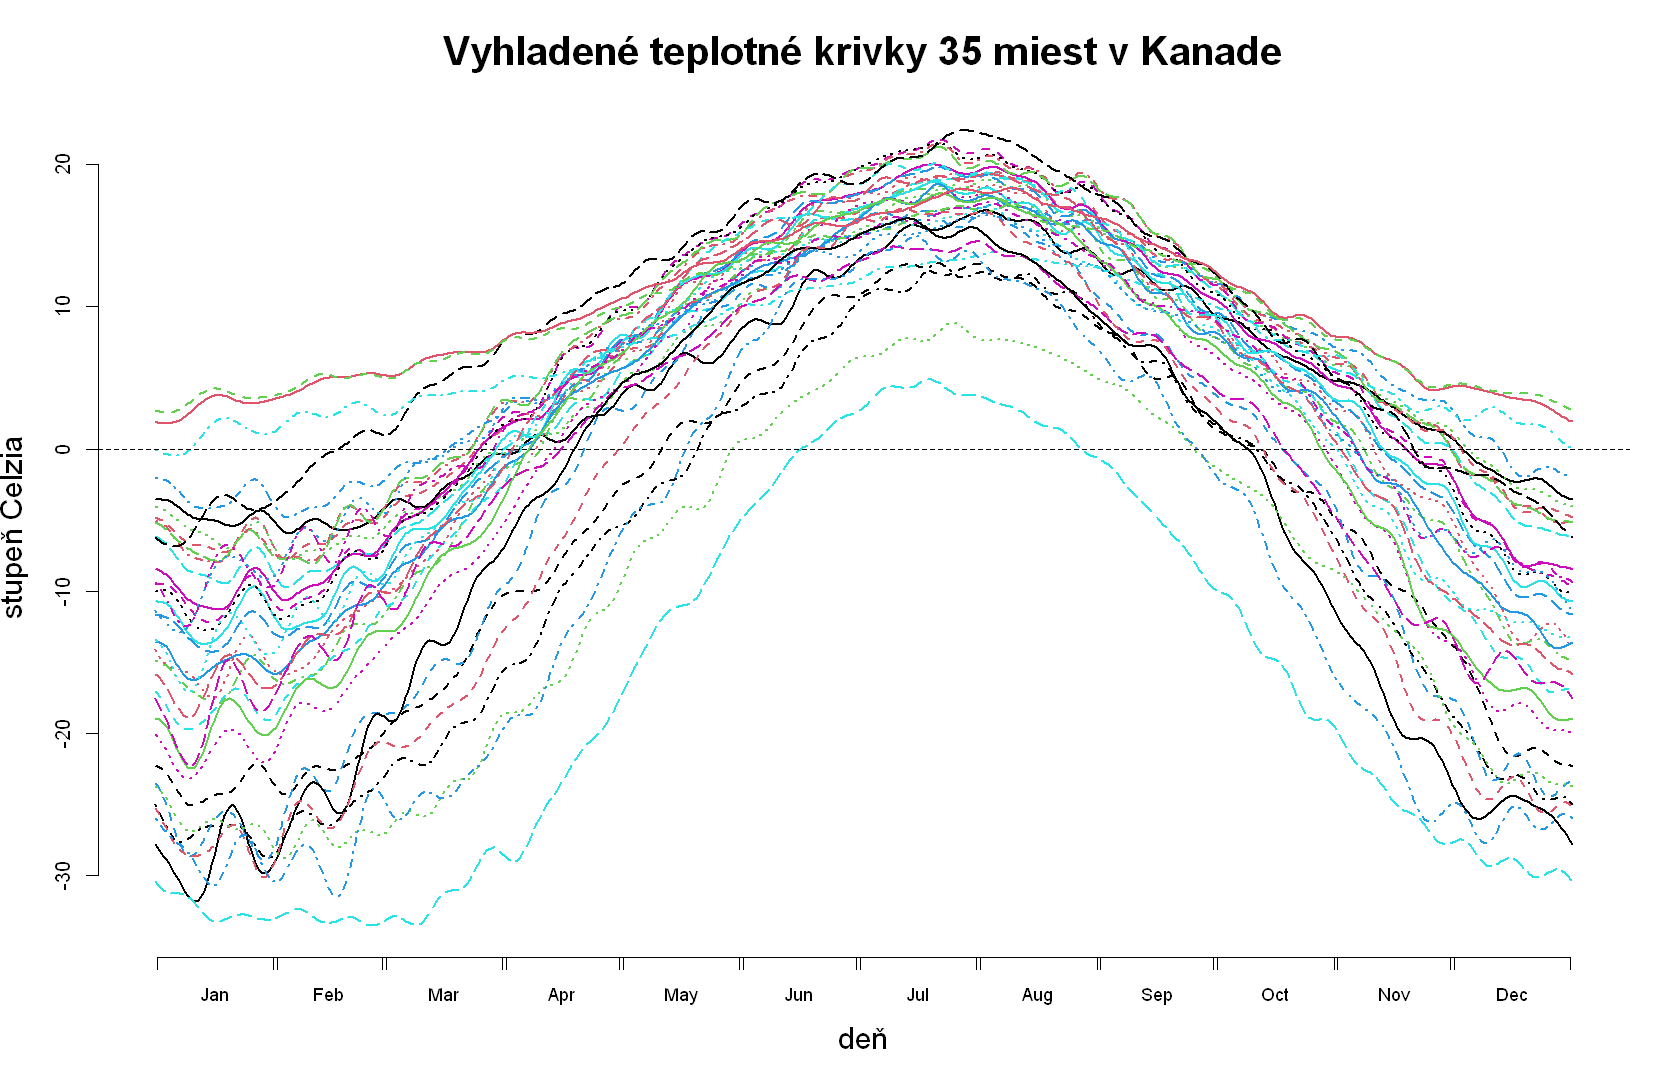

In [328]:
options(repr.plot.width=14, repr.plot.height=9)
plot(daytempfd2, axes=FALSE, 
        cex.lab=1.5,lwd=2, main="Vyhladené teplotné krivky 35 miest v Kanade", cex.main=2)
axisIntervals(1)
axis(2)

[1] "done"

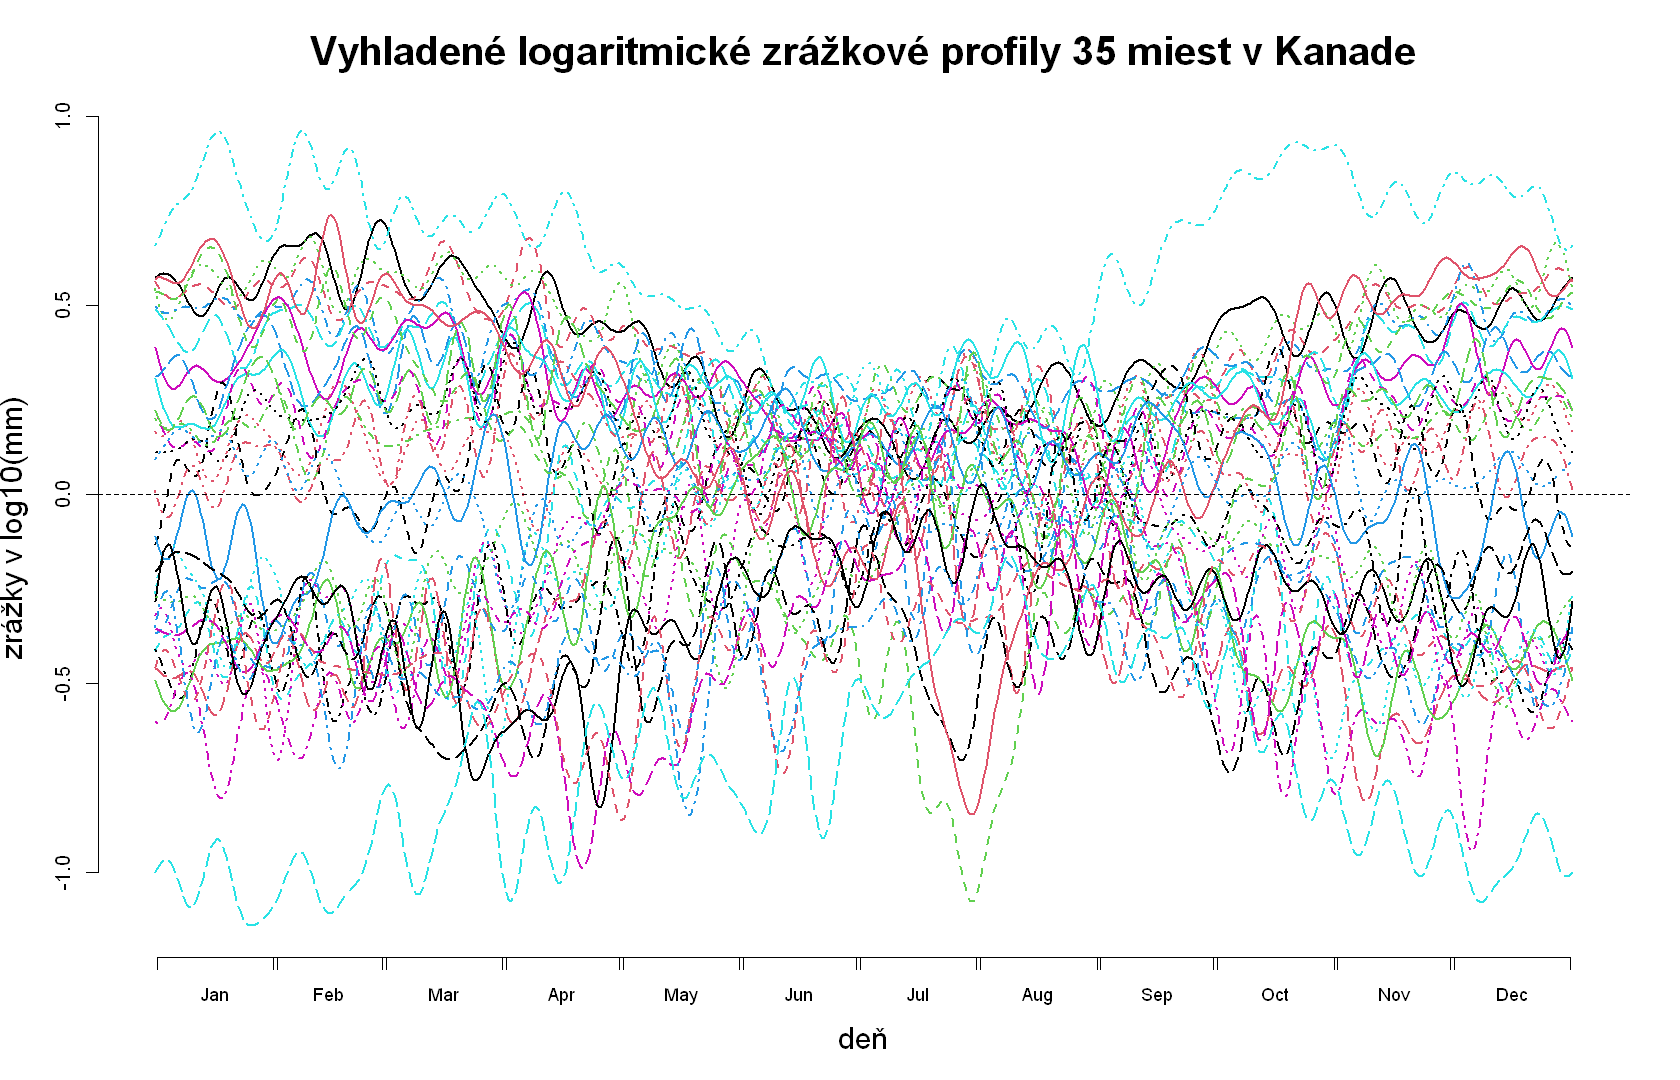

In [329]:
plot(dayprecfd, axes=FALSE, cex.lab=1.5, lwd=2, 
        main="Vyhladené logaritmické zrážkové profily 35 miest v Kanade", cex.main=2)
axisIntervals(1)
axis(2)

**<font size=4 color=darkgreen> 1.3 FCPA </font>** <br>

V regresných modeloch môžeme používať aj skóre komponentov FCPA (alebo interpretácie výsledkov FPCA). Ukážeme si aj inú implementáciu tejto metódy a to pomocou funkcie `pca.fd()` z balíka *fda*. Výhodou tejto implementácie je pomerne jednoduché vykreslenie potrebných graf na interpretáciu jednotlivých komponentov.

In [330]:
# vytvorime si objekty funkcionalnych parametrov s danou bazou, diff. operatorom a lambdou
harmfdPar     <- fdPar(daybasis65, linearny_diff_operator, 1e6)
# na vykonanie metody fpca vyuzijeme tuto implementaciu, kde vstupom su data, 
# pocet prvych komponentov, ktore sa maju vykreslit (neskor) a funcionalne parametre
daytemppcaobj <- pca.fd(daytempfd,nharm=4, harmfdPar)

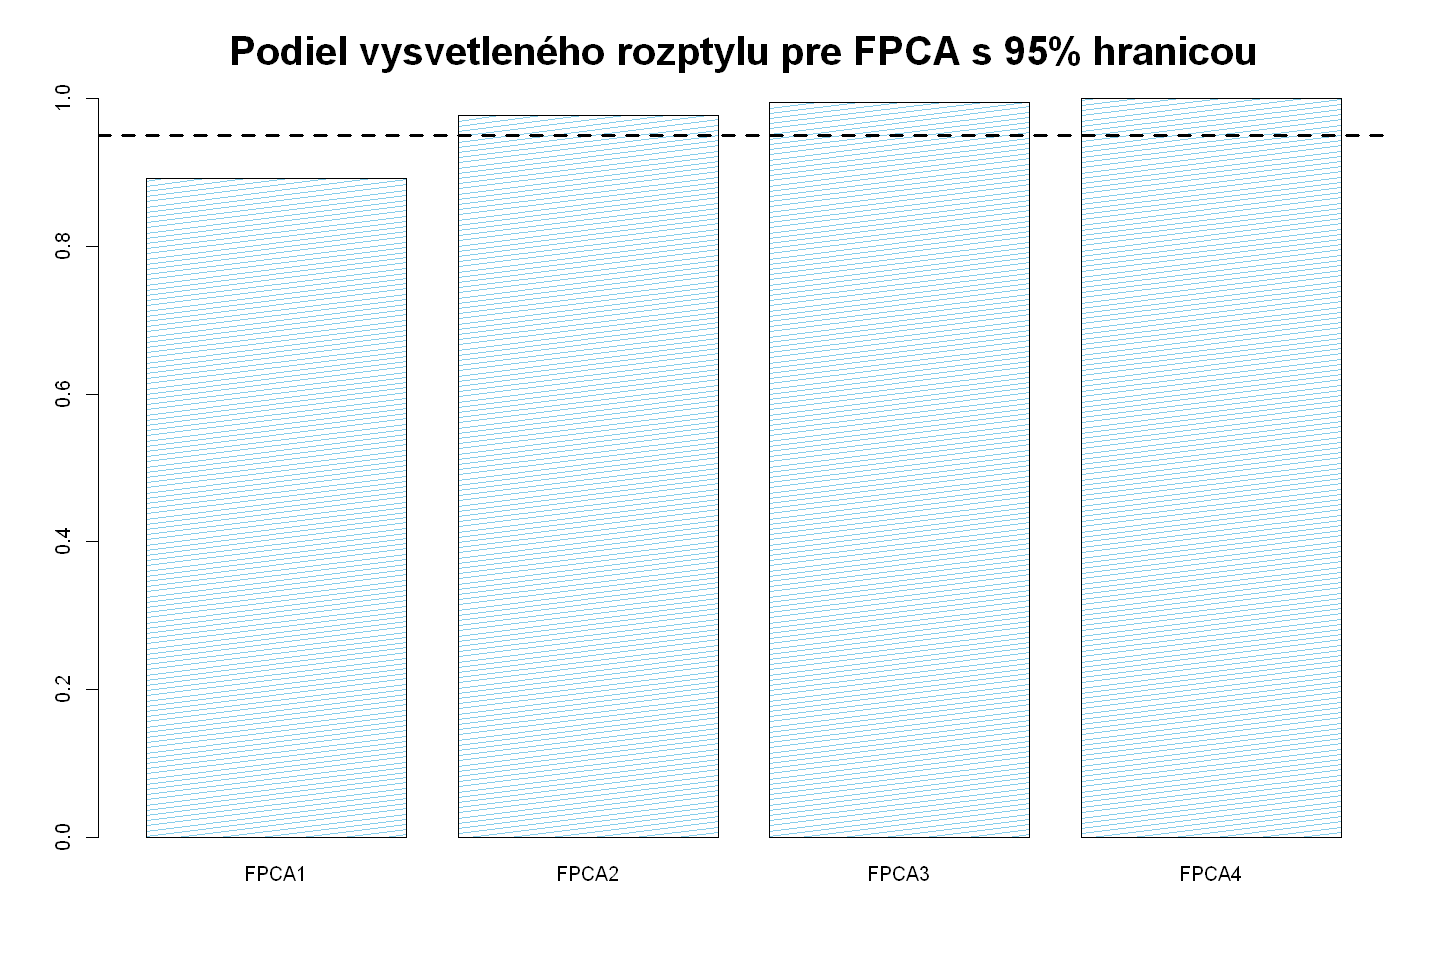

In [331]:
options(repr.plot.width=12, repr.plot.height=8)
pve.face <- (cumsum(daytemppcaobj$varprop)/sum(daytemppcaobj$varprop))
barplot(pve.face, ylim=c(0,1), col="skyblue", main="Podiel vysvetleného rozptylu pre FPCA s 95% hranicou", cex.main=2, 
        names.arg = c("FPCA1","FPCA2","FPCA3","FPCA4"),density=c(30,30,30,30) , angle=c(11,11,11,11) )
abline(0.95,0, lwd=3, lty=2)

Pri striktnom dodržaní 95% vysvetlenia rozptylu pôvodných dát, vyberieme len 2 hlavné komponenty.

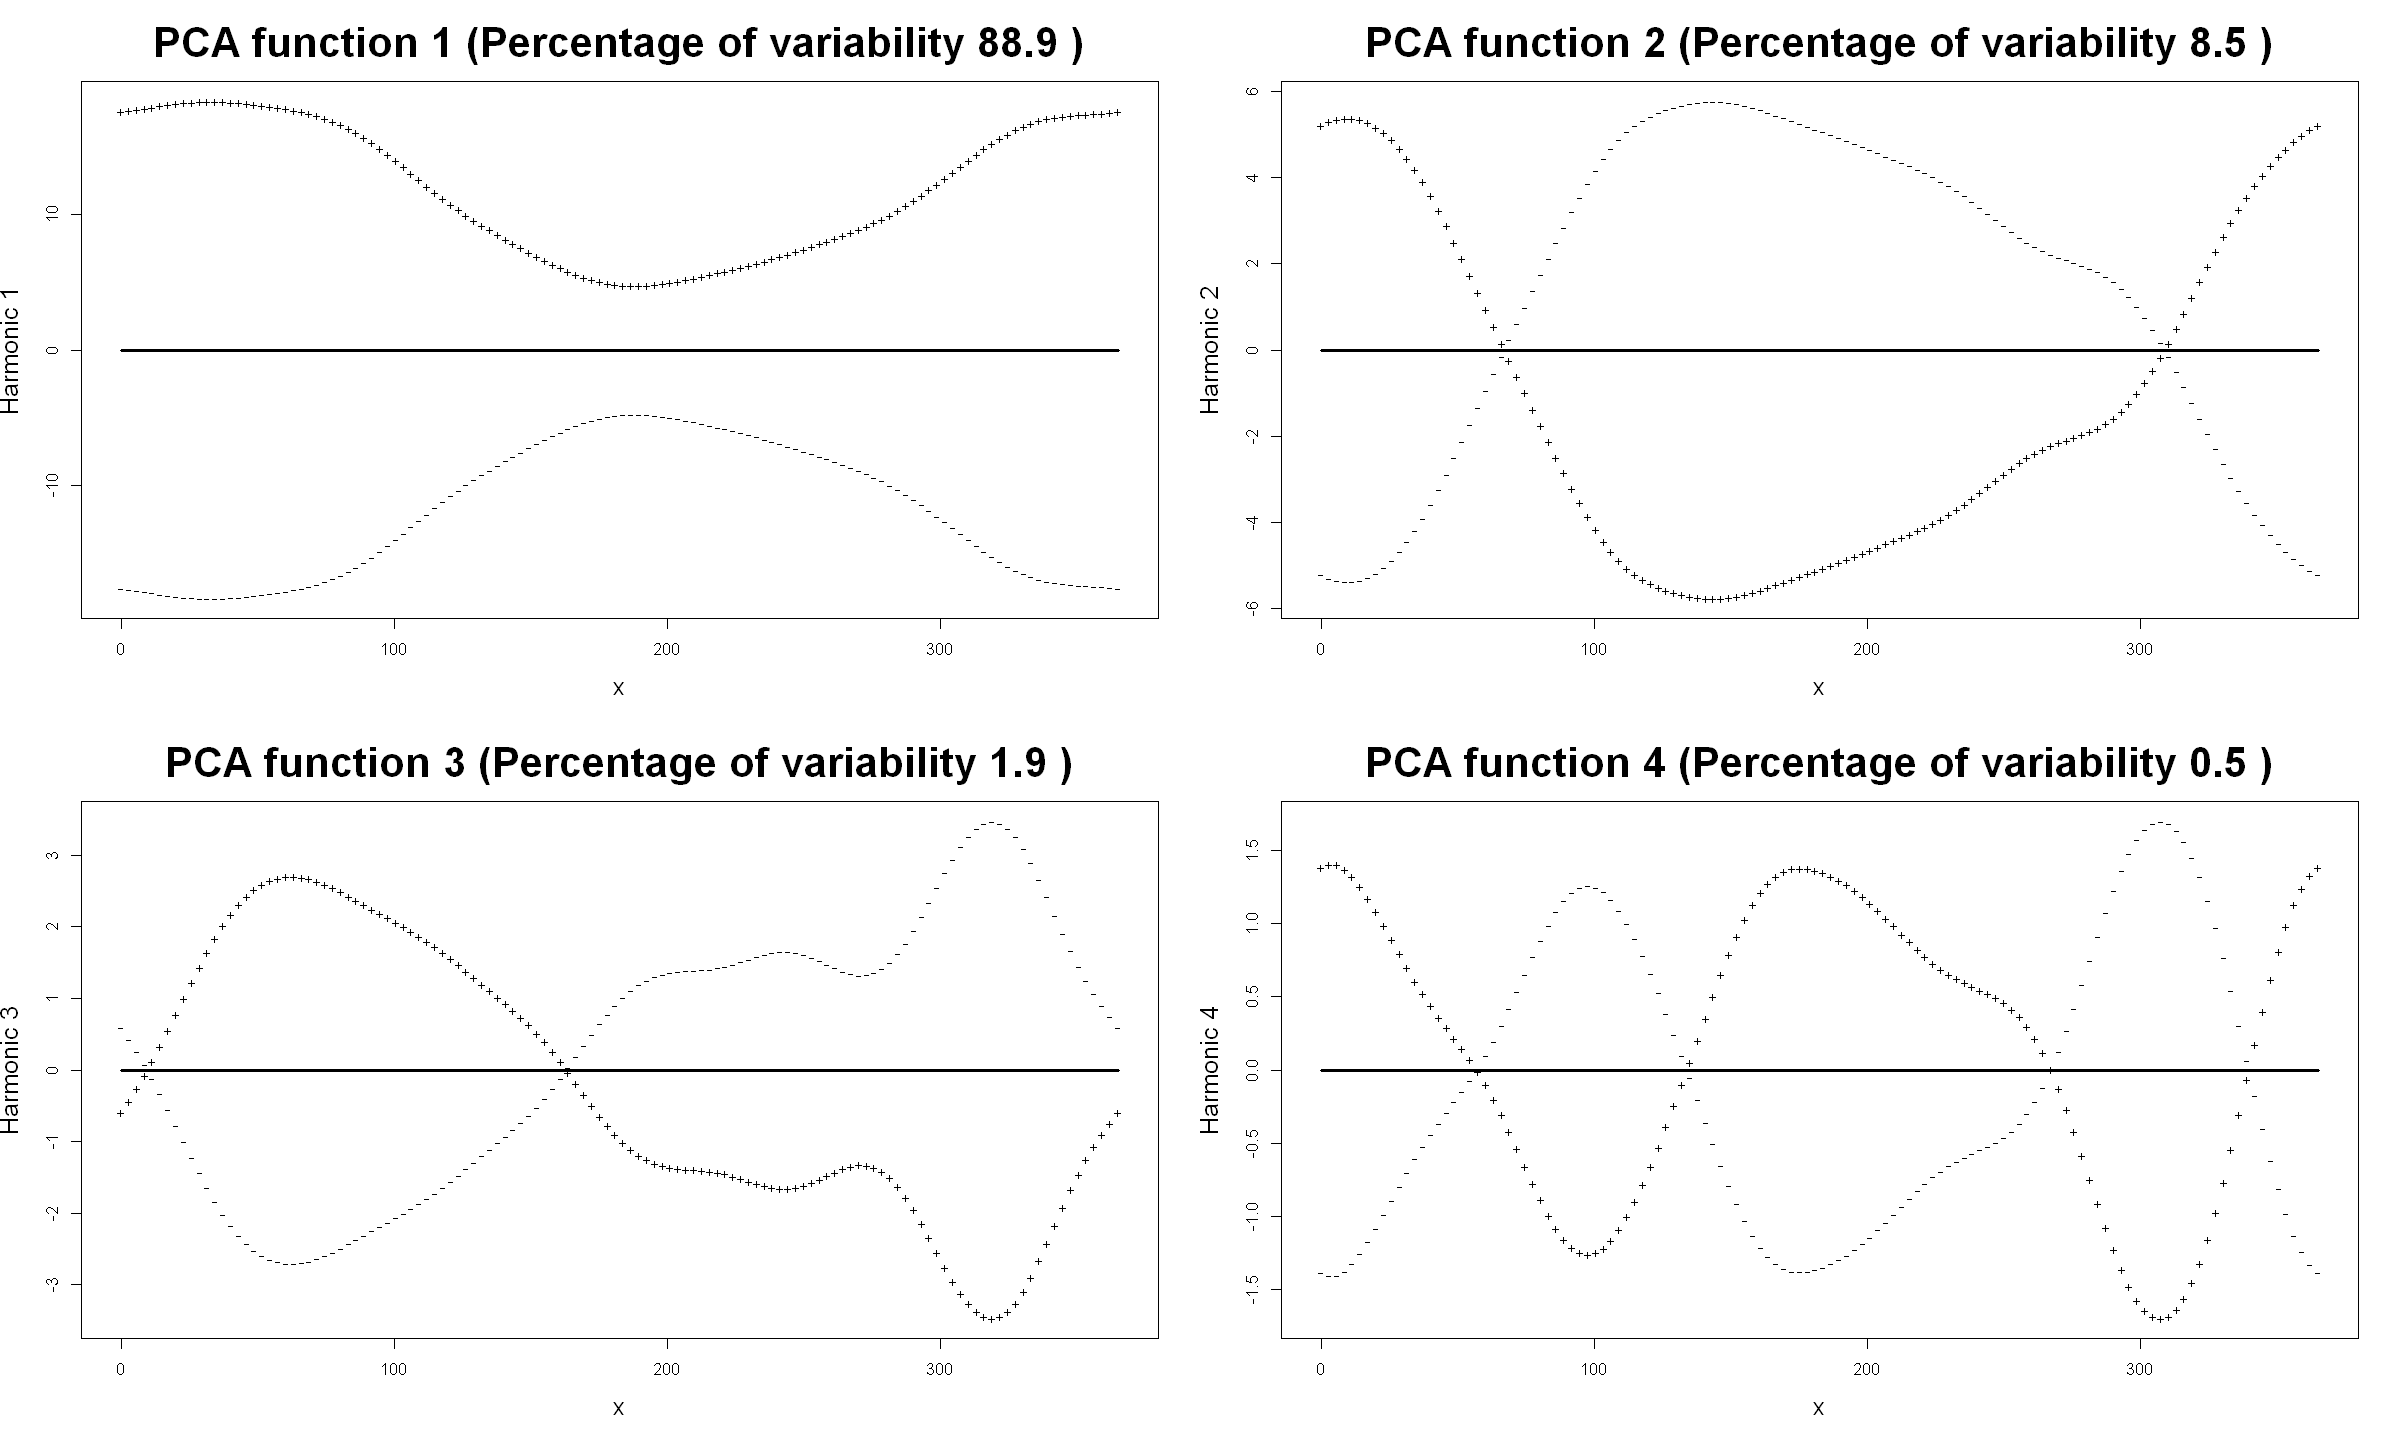

In [332]:
options(repr.plot.width=20, repr.plot.height=12)
par(mfrow=c(2,2), pty="m")
# vykreslime si aj grafy ucinkov komponentov na krivku priemeru s percentom vysvetleneho rozptylu
plot.pca.fd(daytemppcaobj, cex.main=2.5, cex.lab=1.5, lwd=3)

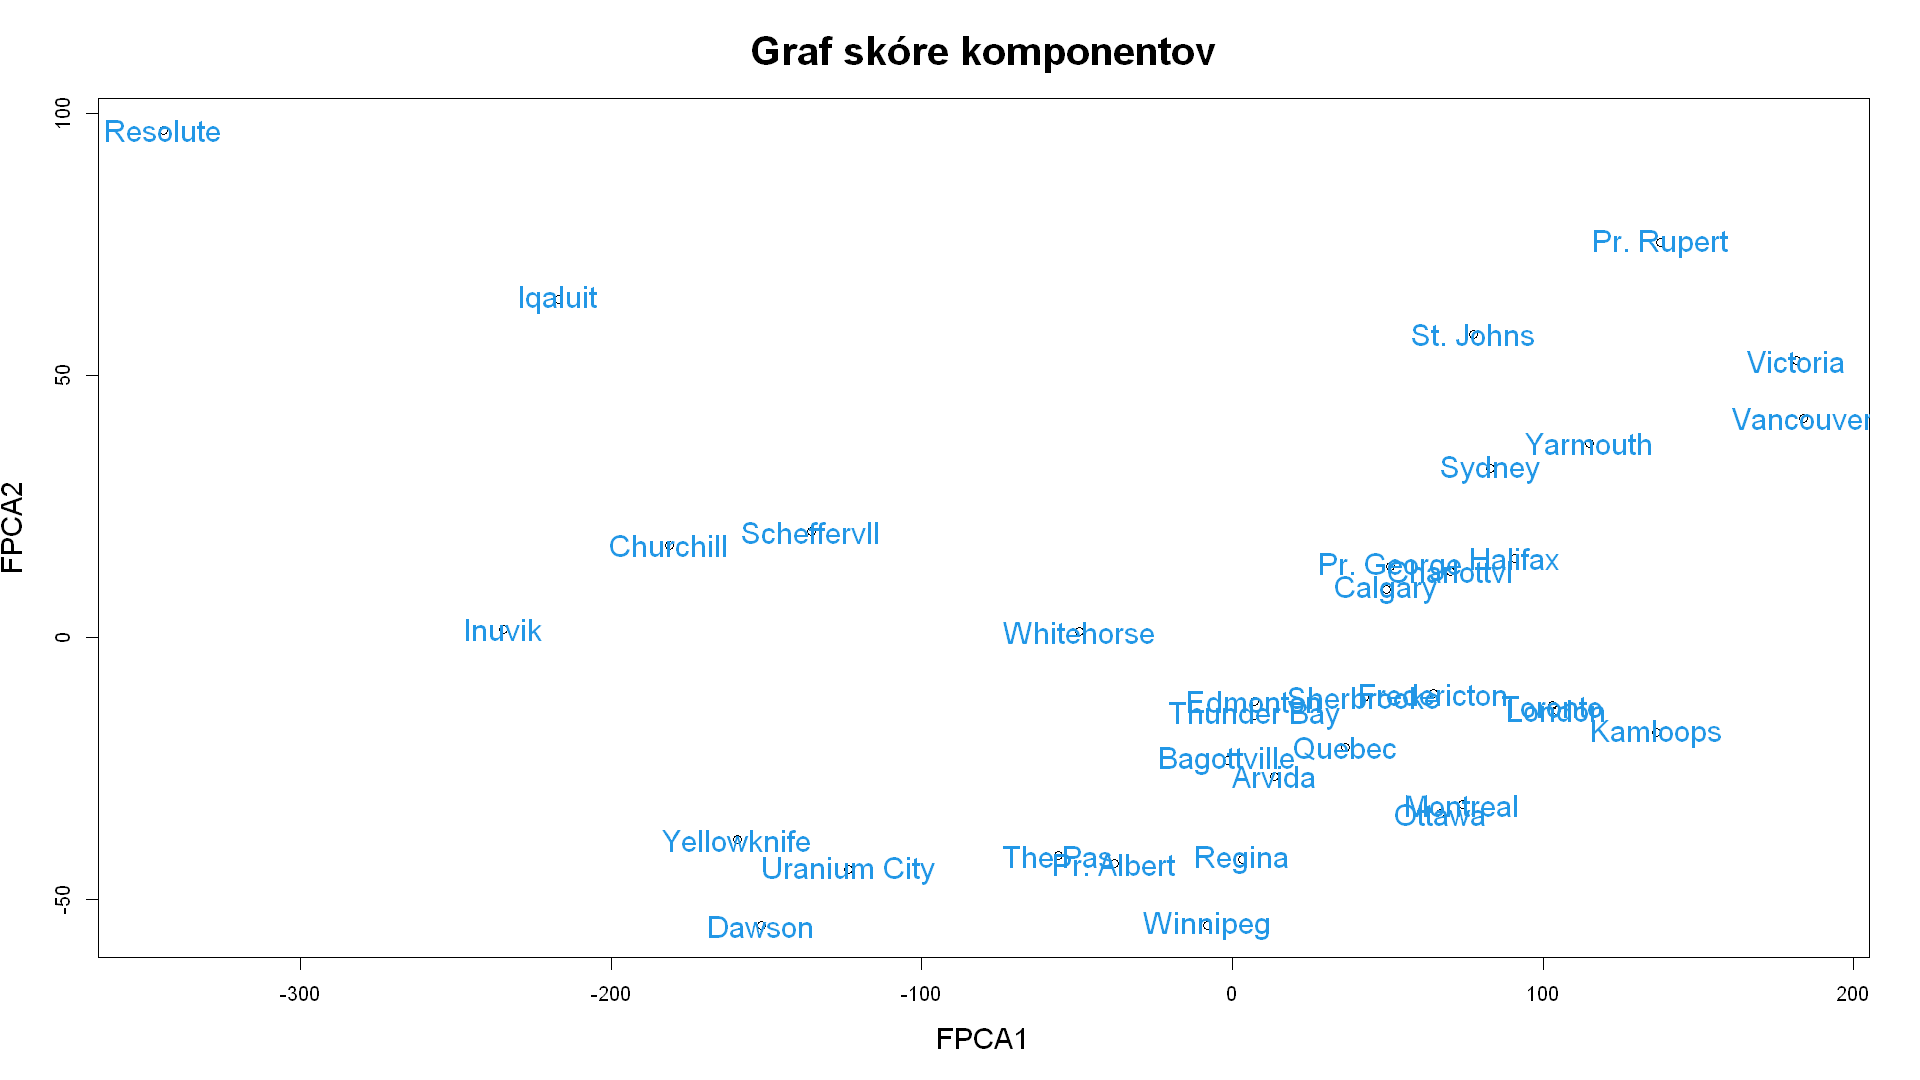

In [333]:
harmscr <- daytemppcaobj[[3]]
options(repr.plot.width=16, repr.plot.height=9)
plot(harmscr[,1], harmscr[,2], xlab="FPCA1", ylab="FPCA2", cex.lab=1.45, main="Graf skóre komponentov", cex.main=2)
text(harmscr[,1], harmscr[,2], CanadianWeather$place, col=4, cex=1.5)

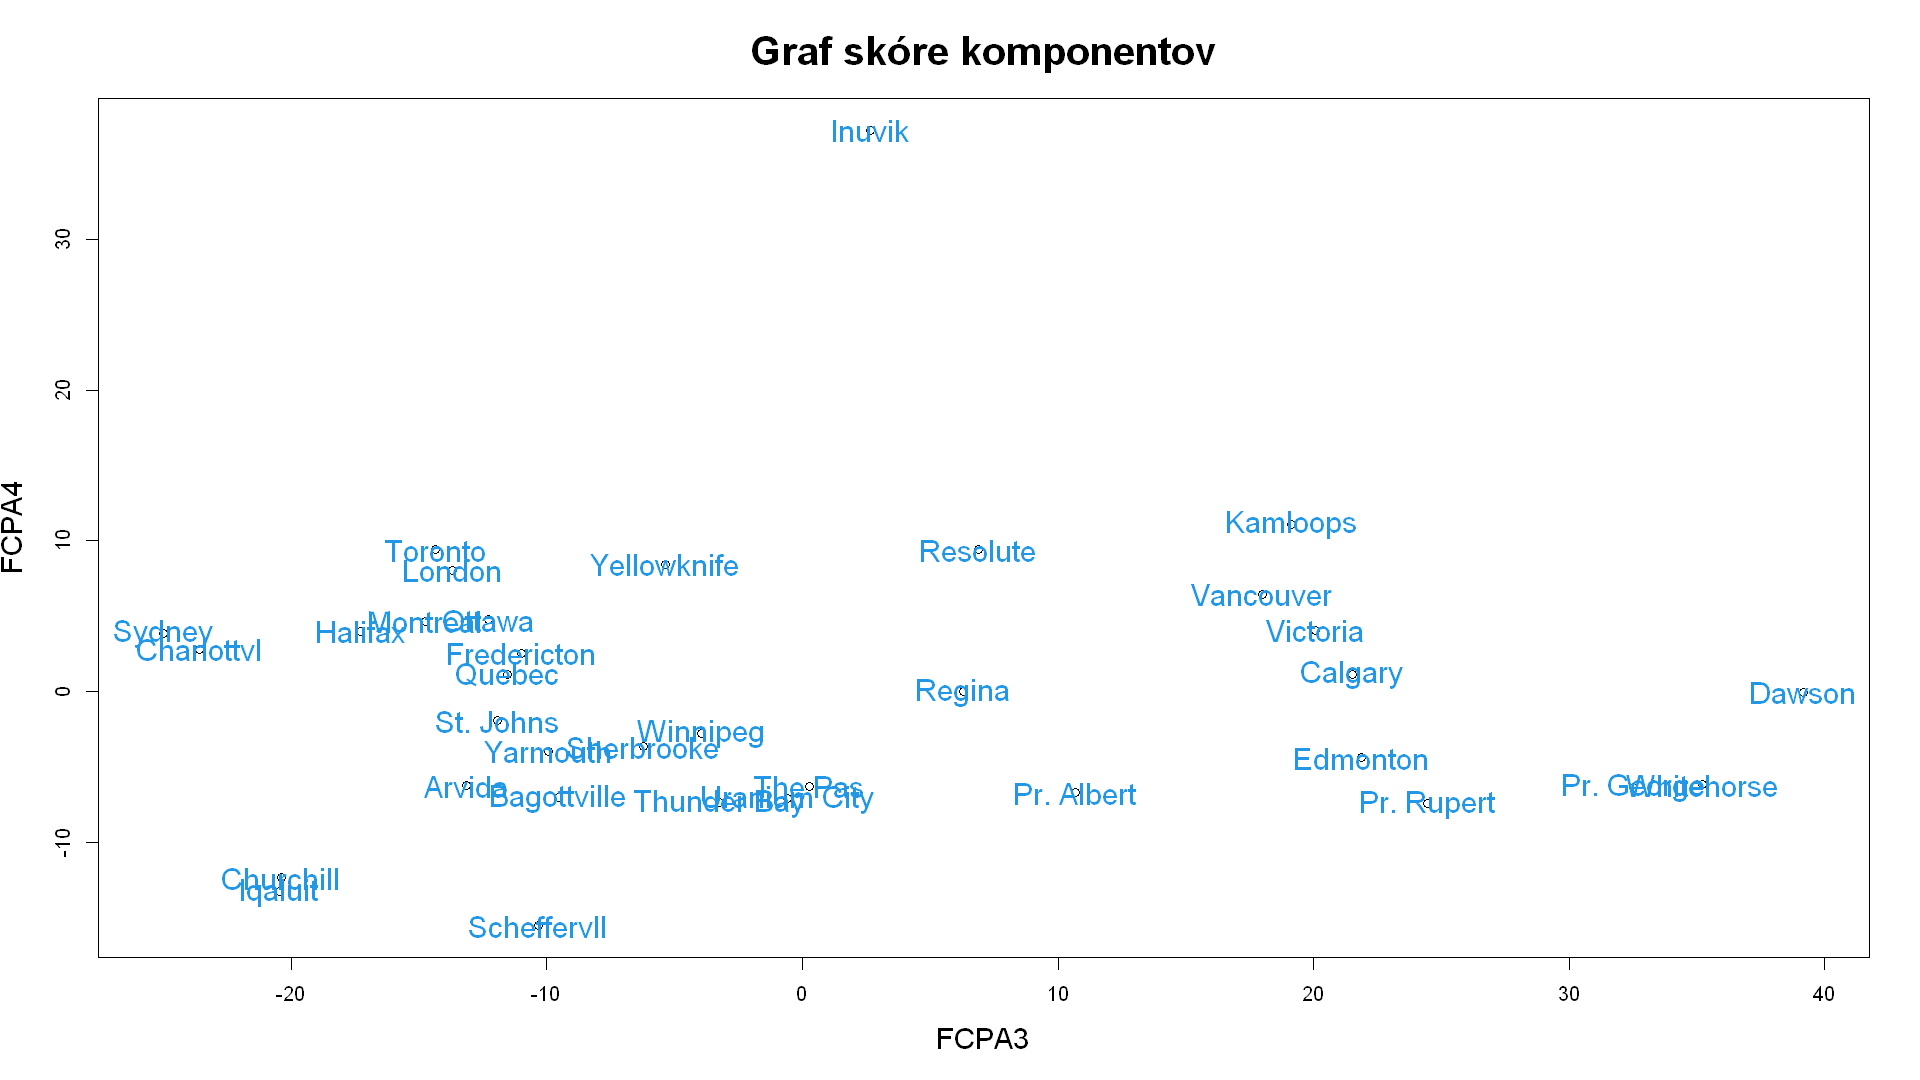

In [334]:
plot(harmscr[,3], harmscr[,4], xlab="FCPA3", ylab="FCPA4", cex.lab=1.45,main="Graf skóre komponentov", cex.main=2)
text(harmscr[,3], harmscr[,4], CanadianWeather$place, col=4, cex=1.5)

Grafy účinku jednotlivých vlastných funkcií na krivku priemeru aj grafy skóre komponentov nám dávajú pomerne neužitočné informácie. Podľa Ramsaya a kol. (2005) je vhodné použitie **rotácie vlastných vektorov**. Optimálnu rotáciu nájdeme pomocou metódy **varimax**, ktorá maximalizuje priemerný rozptyl vysvetlený spoločnými faktormi a minimalizuje tak počet premenných s vysokými koeficientami (záťažami) u každého faktora (Žežula, 2015).

**<font size=4 color=darkgreen> 1.4 FCPA - varimax </font>** <br>

Túto metódu vieme pomerne jednoducho použiť. V balíku *fda* (Ramsay a kol., 2022) máme opäť vhodnú implementáciu pomocou funkcie `varmx.pca.fd()`, kde vstupným parametrom je objekt triedy `pca.fd`, ktorý je výstupom funkcie `pca.fd()`.

In [335]:
# vstupom metody bude vystup metody pca.fd()
daytemppcaobjVM <- varmx.pca.fd(daytemppcaobj)
dimnames(daytemppcaobjVM$scores)[[2]] <- paste("PCA", 1:4, sep=".")

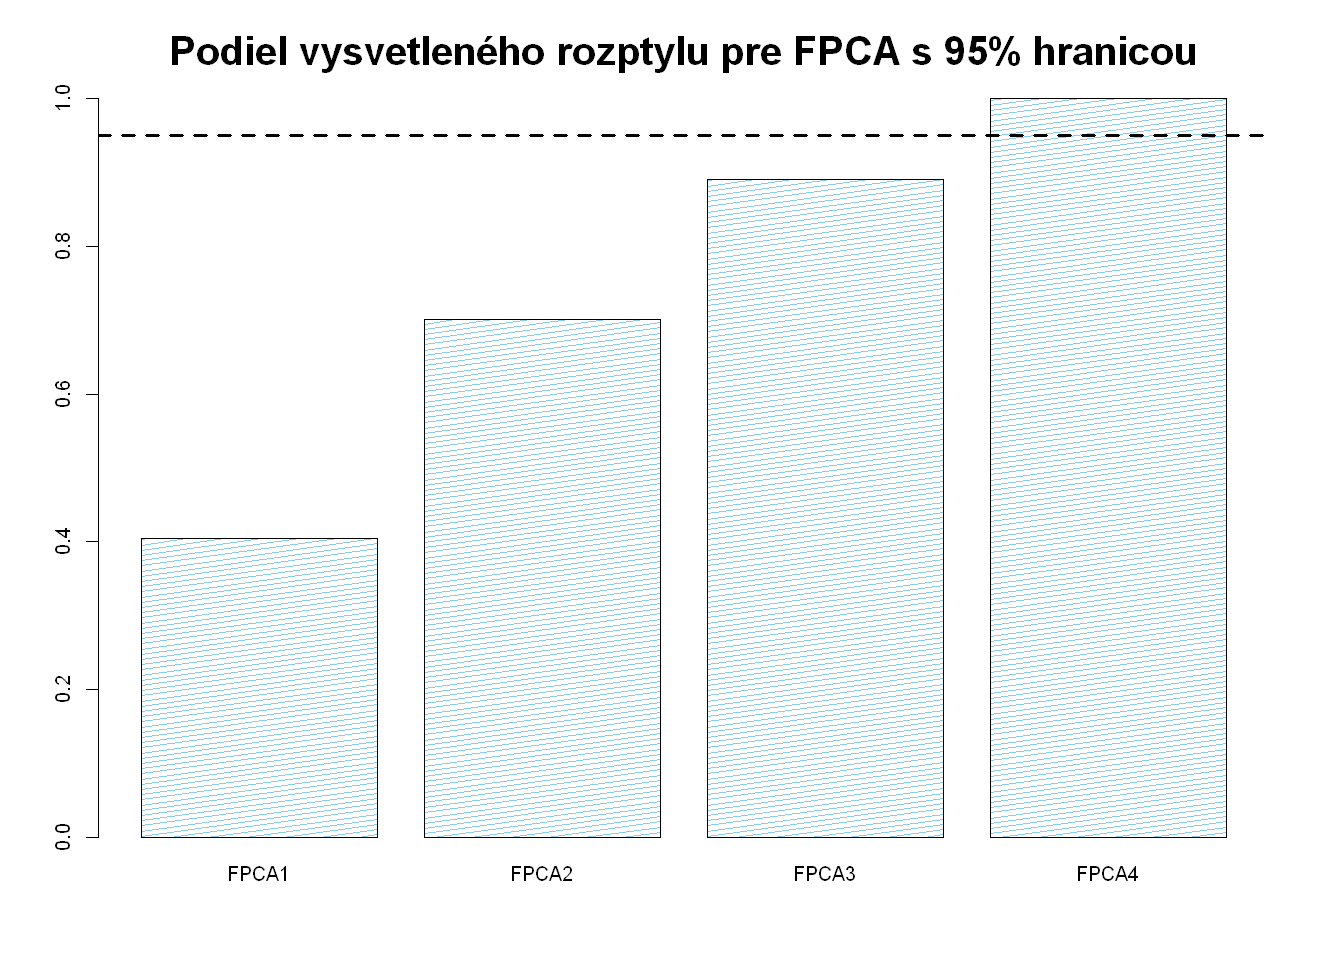

In [336]:
pve.face <- (cumsum(daytemppcaobjVM$varprop)/sum(daytemppcaobjVM$varprop))
options(repr.plot.width=11, repr.plot.height=8)
barplot(pve.face, ylim=c(0,1), col="skyblue", main="Podiel vysvetleného rozptylu pre FPCA s 95% hranicou", cex.main=2, 
        names.arg = c("FPCA1","FPCA2","FPCA3","FPCA4"),density=c(30,30,30,30) , angle=c(11,11,11,11) )
abline(0.95,0, lwd=3, lty=2)

Po rotácií faktorov dostaneme až 4 hlavné komponenty, ktoré vysvetlia viac, ako 95% rozptylu pôvodných dát. 

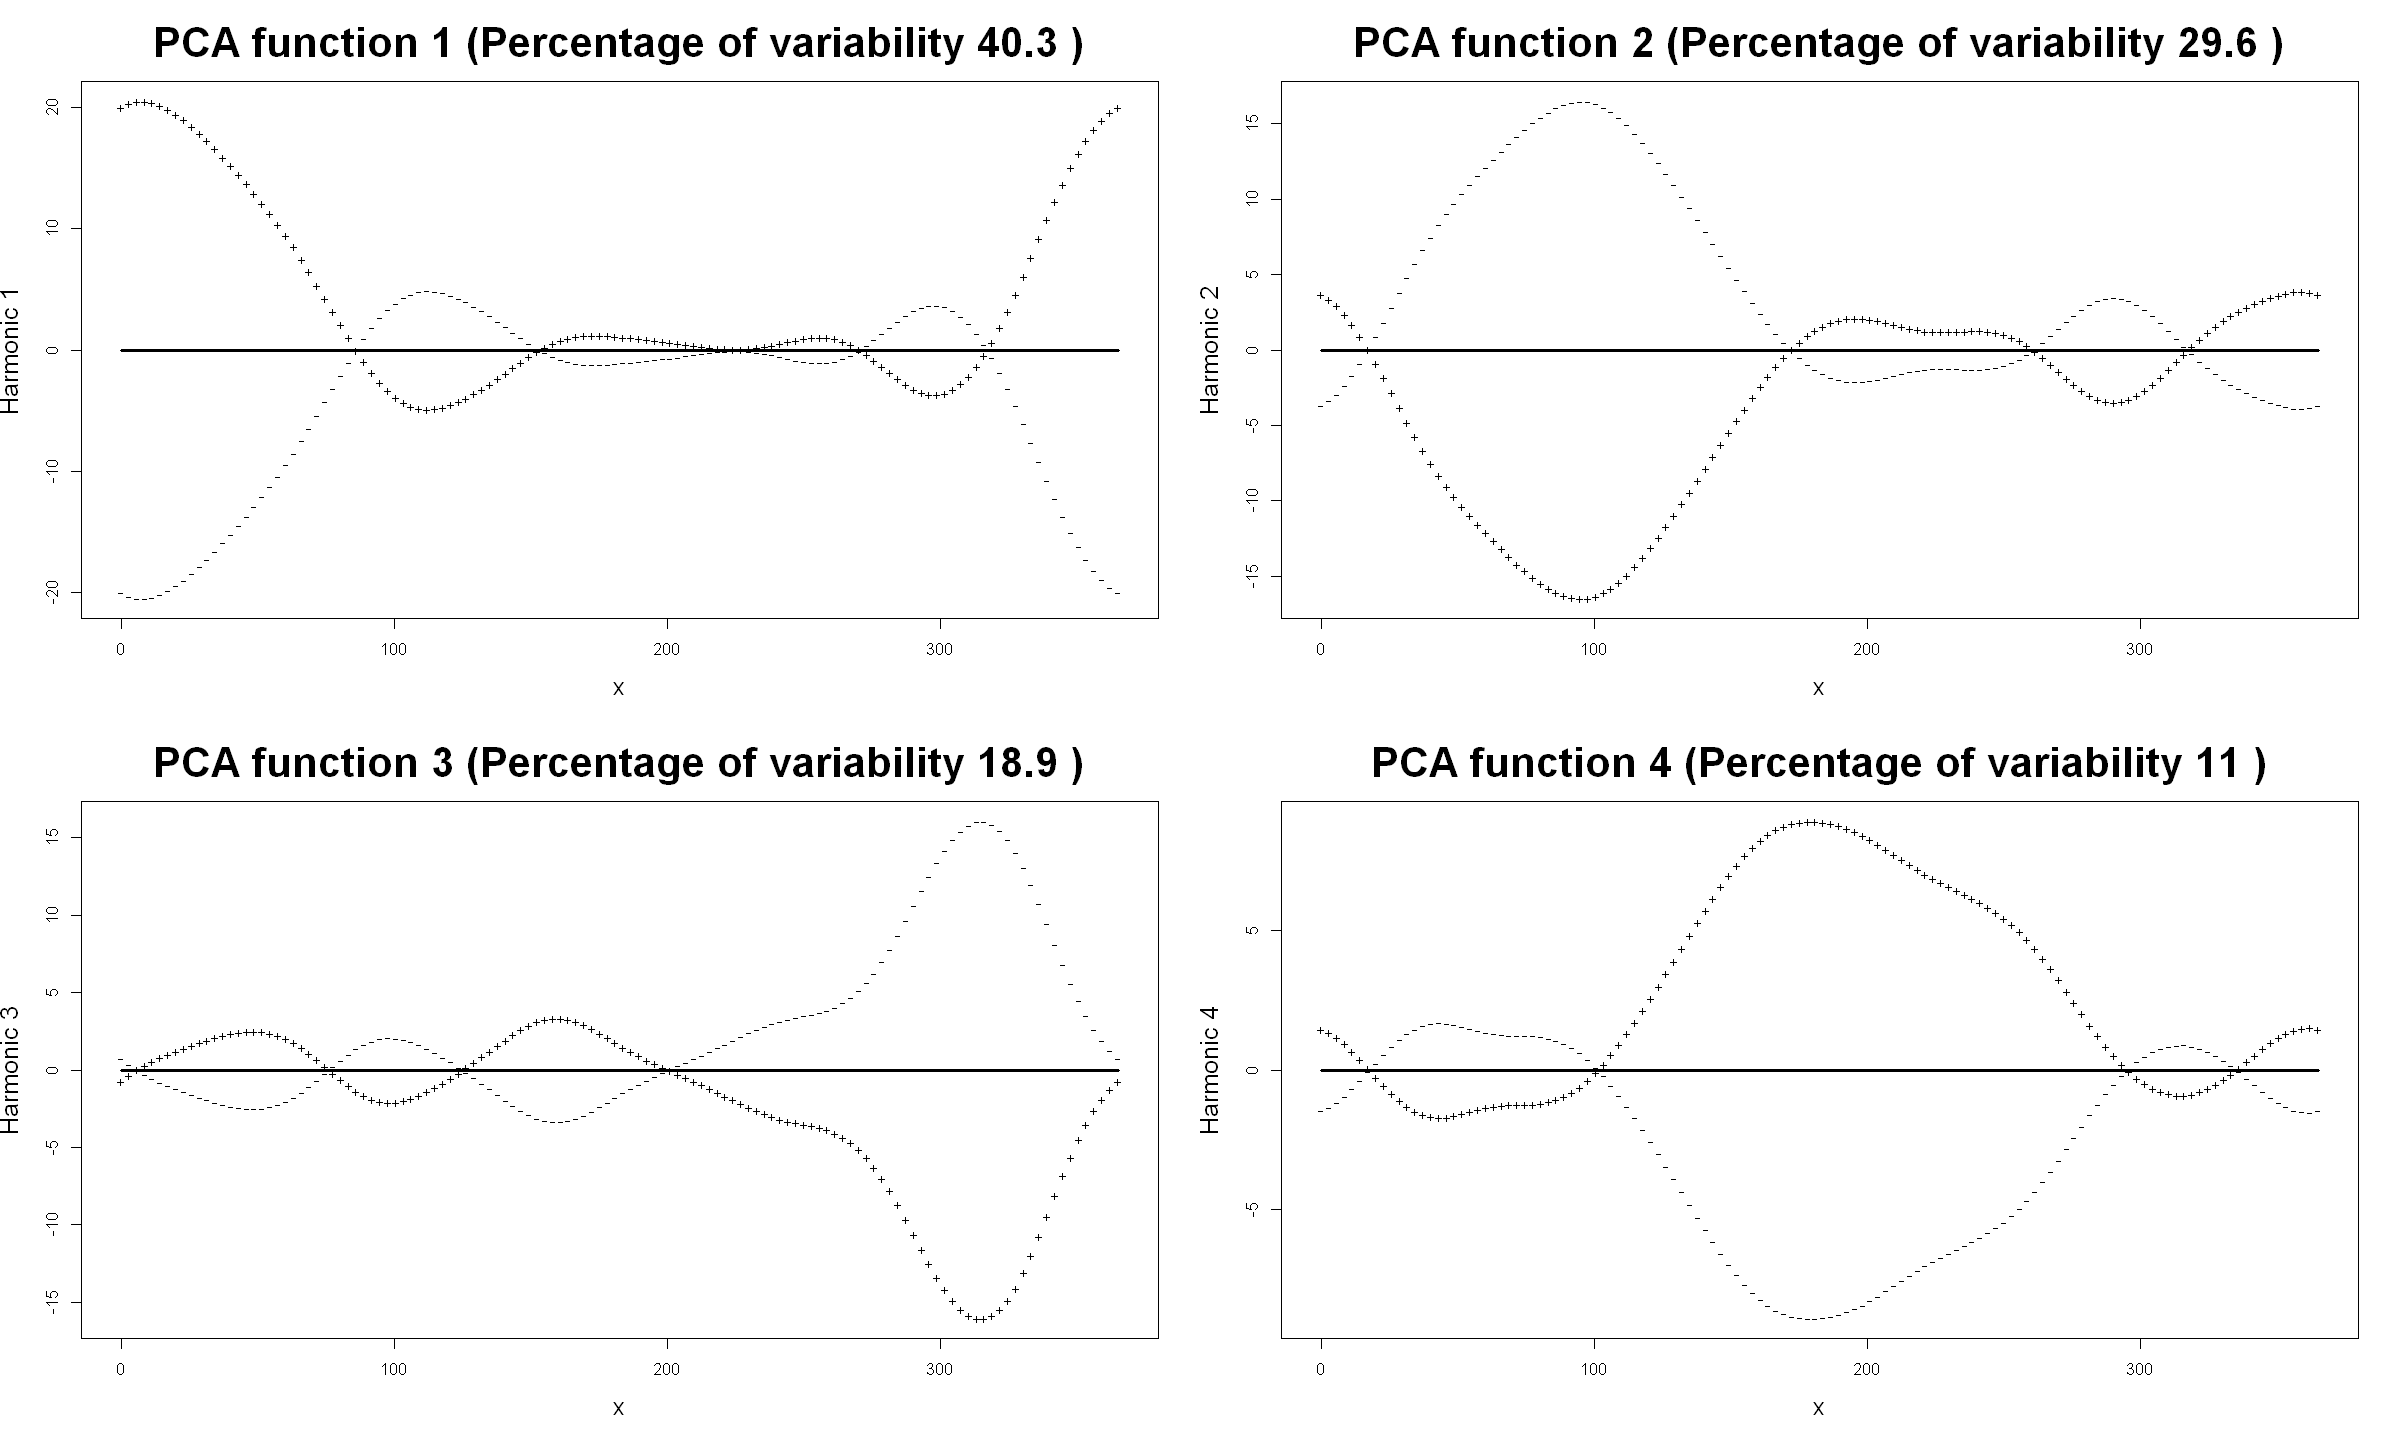

In [337]:
options(repr.plot.width=20, repr.plot.height=12)
par(mfrow=c(2,2), pty="m")
# vykreslime si aj grafy ucinkov komponentov na krivku priemeru s percentom vysvetleneho rozptylu
plot.pca.fd(daytemppcaobjVM, cex.main=2.5, cex.lab=1.5, lwd=3)

Grafy účinku jednotlivých vlastných funkcií na krivku priemeru nám už poskytujú rozumnejšiu interpretáciu. Prvý komponent môže popisovať rozdiely teplôt počas **zimy**, druhý komponent rozdiely teplôt v **jarnom období**, tretí komponent rozdiely teplôt počas **jesene** a štvrtý komponent rozdiely teplôt v **letnom období**. Aj nasledujúce grafy skóre komponentov nám túto interpretáciu potvrdia.

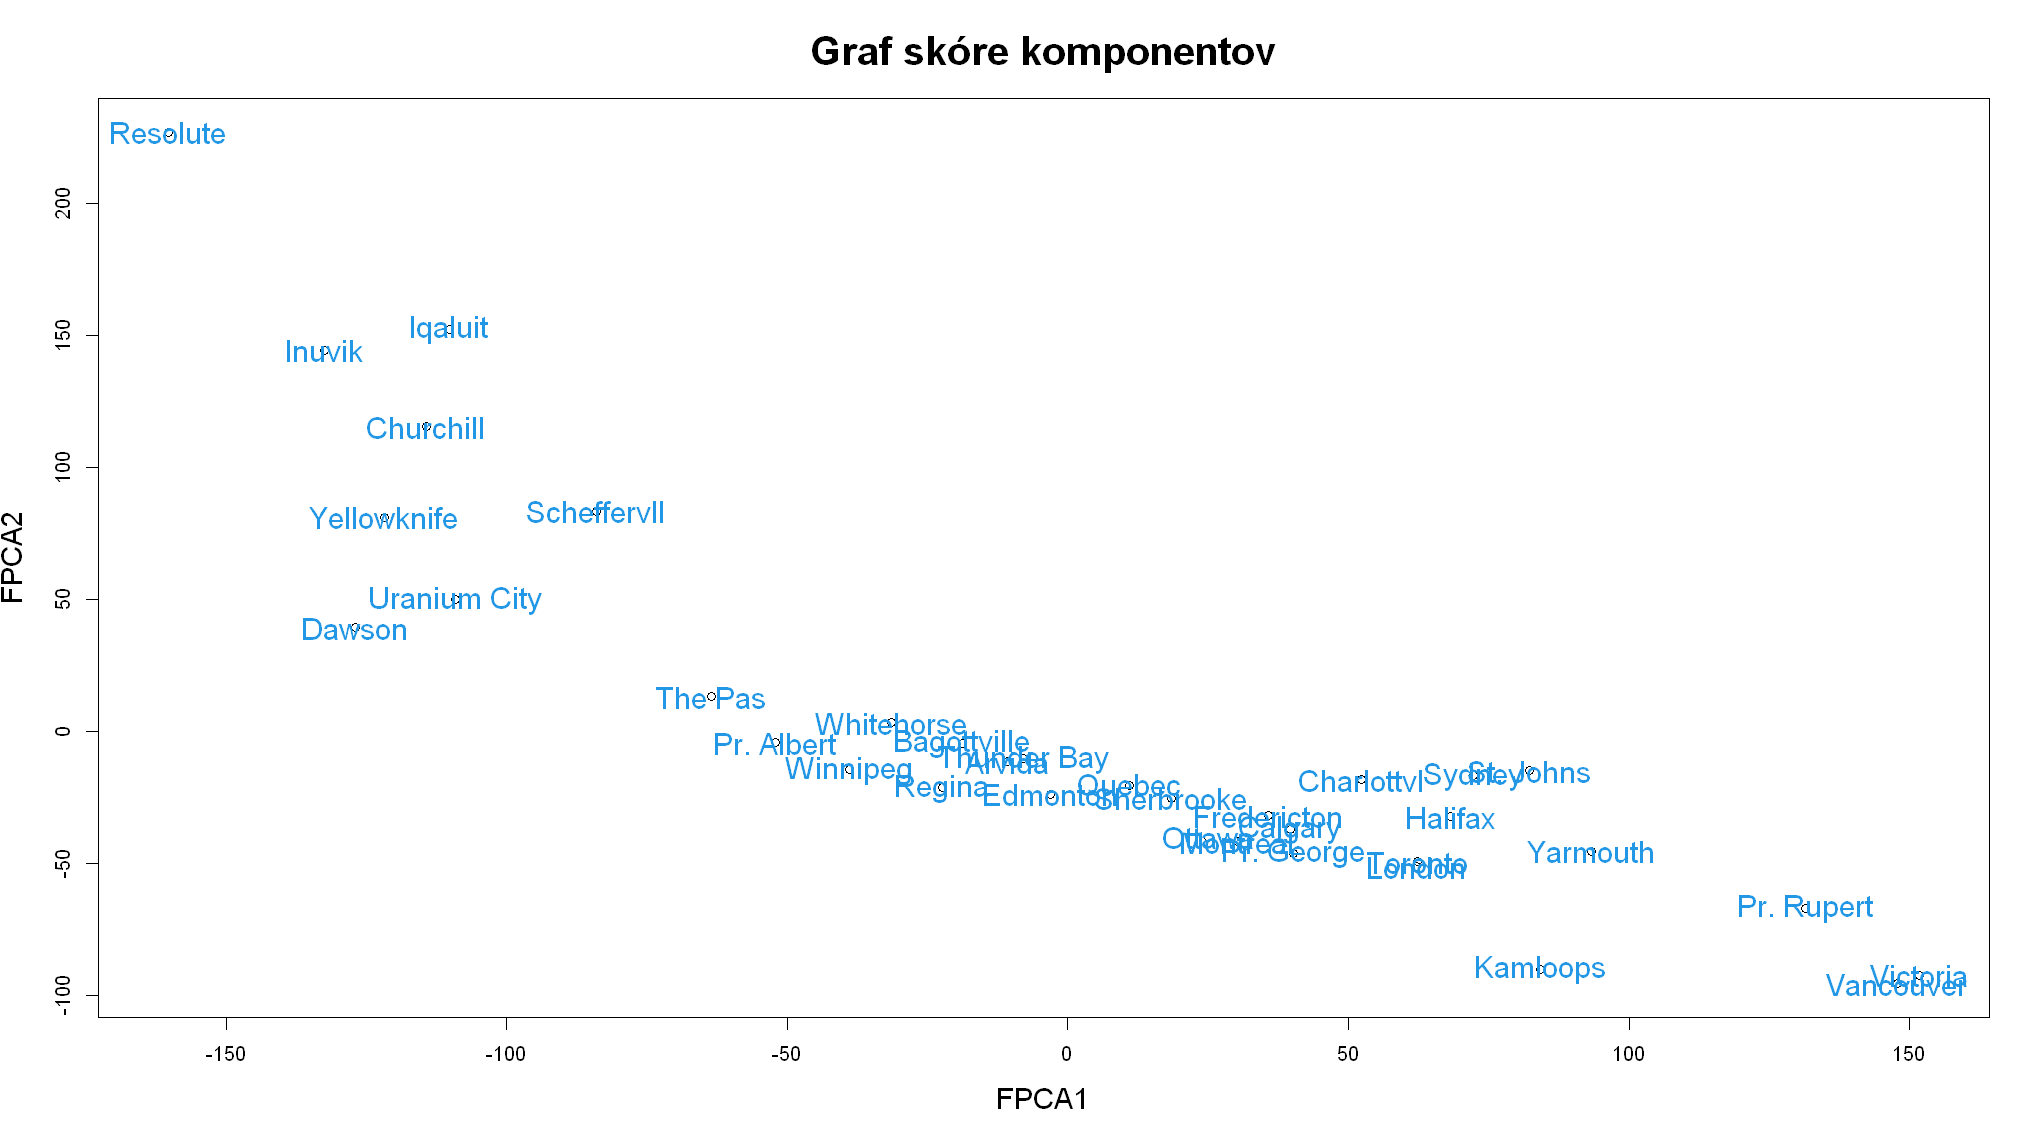

In [338]:
harmscr <- daytemppcaobjVM[[3]]
options(repr.plot.width=17, repr.plot.height=9.5)
plot(harmscr[,1], harmscr[,2], xlab="FPCA1", ylab="FPCA2", cex.lab=1.45,main="Graf skóre komponentov", cex.main=2)
text(harmscr[,1], harmscr[,2], CanadianWeather$place, col=4, cex=1.5)

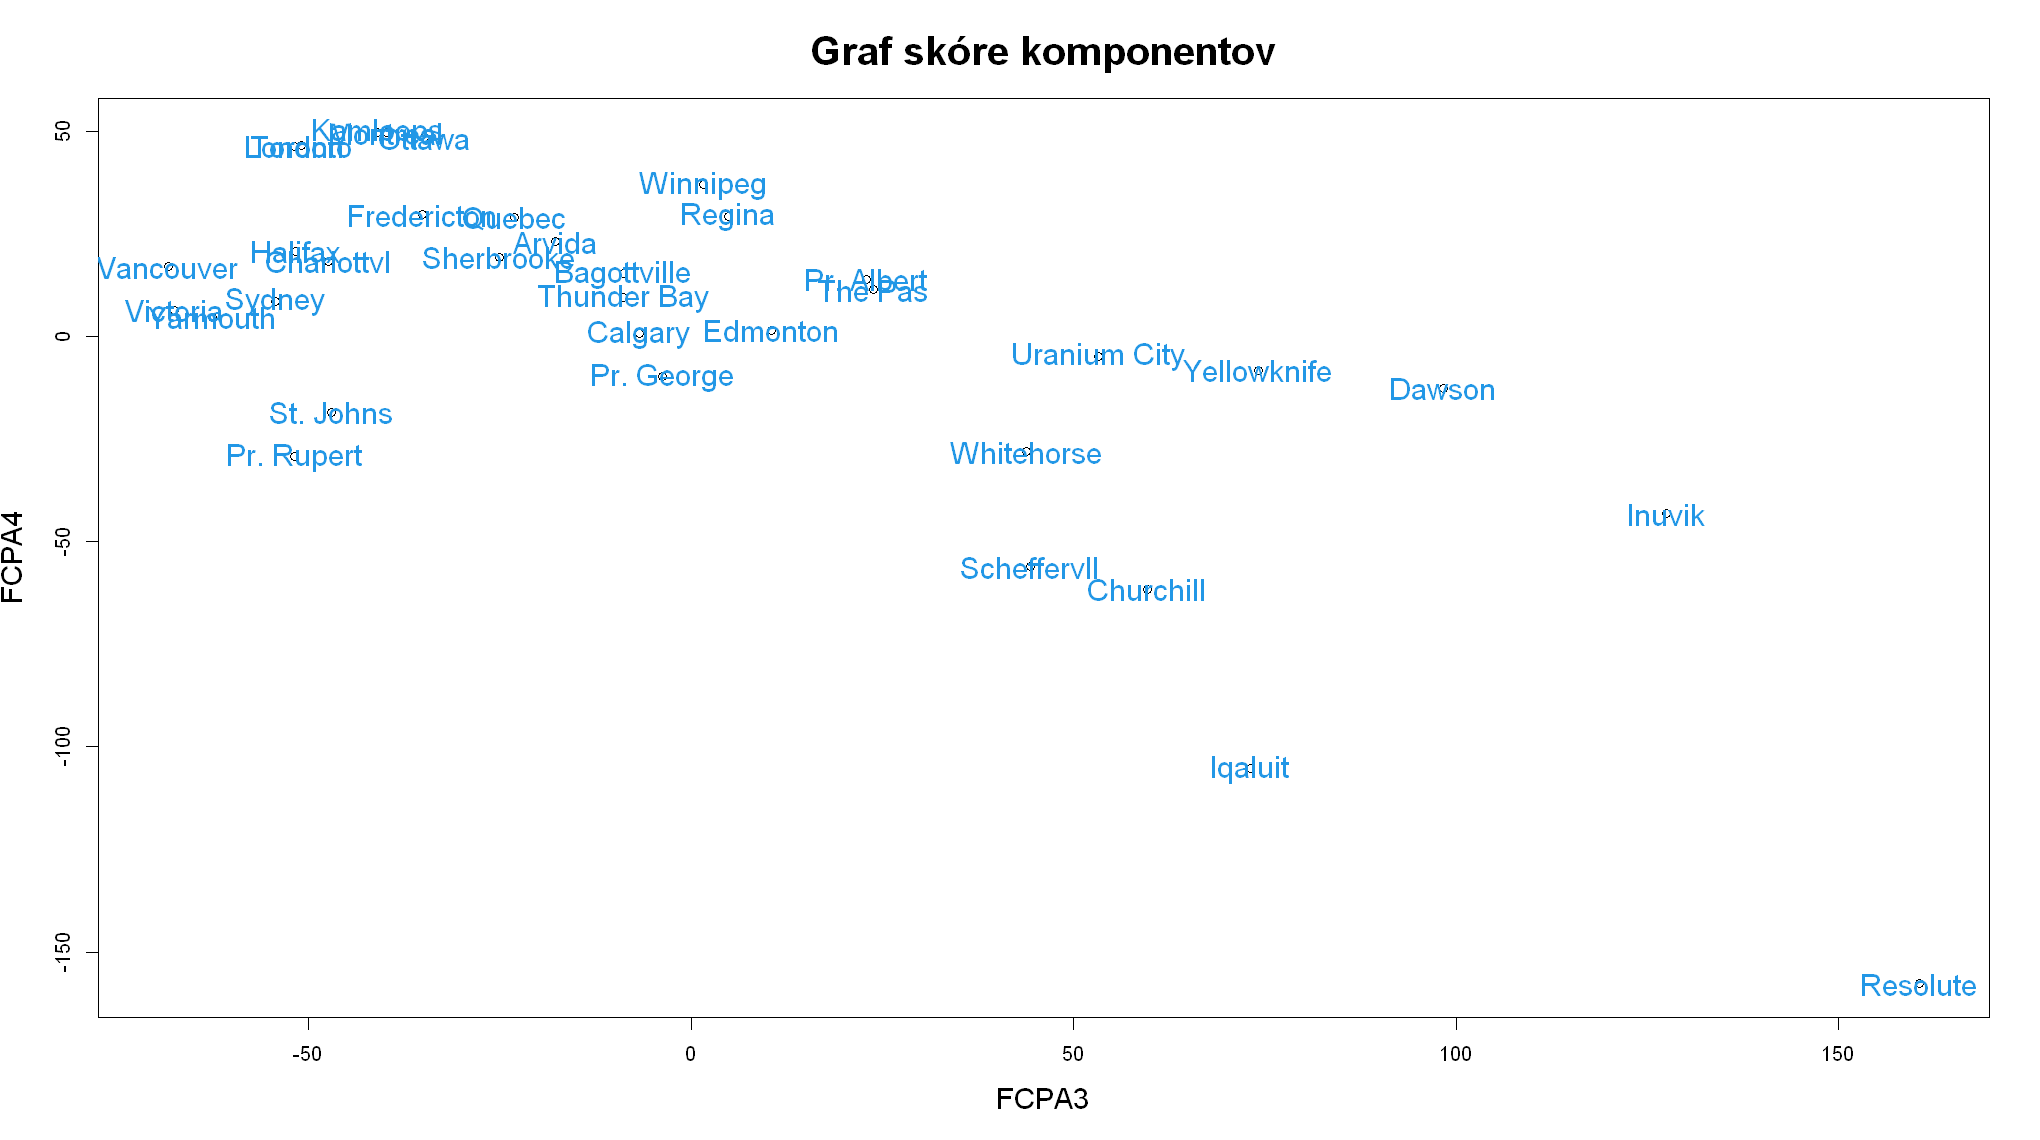

In [339]:
plot(harmscr[,3], harmscr[,4], xlab="FCPA3", ylab="FCPA4", cex.lab=1.45,main="Graf skóre komponentov", cex.main=2)
text(harmscr[,3], harmscr[,4], CanadianWeather$place, col=4, cex=1.5)



V nasledujúcich častiach si ukážeme jednotlivé typy funkcionálneho regresného modelu aplikované na dáta o počasí v Kanadských mestách. Pri ich implementácii sme sa inšpirovali ilustračnou implementáciou (https://rdrr.io/cran/fda/src/demo/canadian-weather.R?fbclid=IwAR2VxoNaHo0PWAwCqzFqgyLItzPHXFW_5QnC_QKRdAETB4jAhalv_hDWoiI) z roku 2008, ktorá je súčasťou balíka *fda* (Ramsay a kol., 2022). Obsahuje však mnohé chyby, ktoré sme následne opravili. Pri využití druhej (jednoduchšej) implementácie sme sa inšpirovali online kurzom Staicu a Parka (2016).

--- 
<a id=SnF></a>
**<font size=5 color=darkgreen> 2. Regresia so skalárnou odozvou a funkcionálnymi regresormi </font>** <br>

Regresia so **skalárnou** odozvou a **funkcionálnymi** regresormi (SnF) má tvar

$$ 	Y_i = \int \beta(s) X_i(s) ds + \epsilon_i. $$

Tento model odhaduje celkové zrážky jednotlivých staníc za rok (v logaritmickej škále) na základe teplotných profilov všetkých staníc. Celkové zrážky sú závislou premennou a teplotné profily nezávislou premennou. 

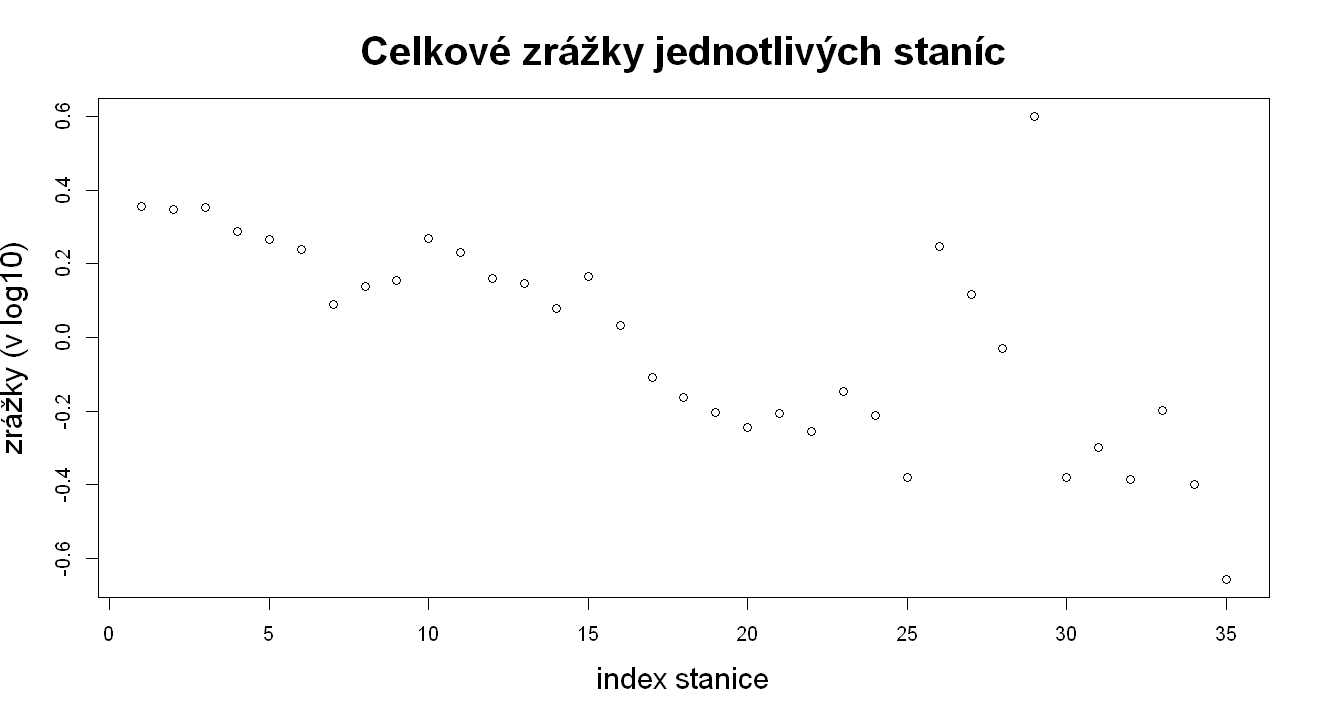

In [340]:
# zlogaritmujeme si a zratame sucet zrazok za rok
celkove_zrazky <- (log10(apply(CanadianWeather$dailyAv[,,"Precipitation.mm"],
                               2,sum))-mean(log10(apply(CanadianWeather$dailyAv[,,"Precipitation.mm"],2,sum))))
options(repr.plot.width=11, repr.plot.height=6)
plot(celkove_zrazky, type="p", xlab="index stanice", ylab="zrážky (v log10)", main="Celkové zrážky jednotlivých staníc", 
     cex.lab=1.5, cex.main=2)

**<font size=4 color=darkgreen> 2.1 Odhad pomocou bázického rozvoja funkcie $\beta$ </font>** <br>

Najjednoduchším spôsobom odhadu beta funkcie je pomocou jej bázického rozvoja, t.j. $$\beta(t) = \sum_{k=1}^{K} c_kB_k(t).$$ 
Potom jej odhadom bude $$\hat{\beta}(t) = \sum_{k=1}^{K} \hat{c}_kB_k(t).$$ 

V tomto príklade použijeme malý počet funkcií v báze, konkrétne len 15. Využijeme funkciu `fRegress()` z balíka *fda* (Ramsay a kol., 2022).

In [341]:
# vytvorime si konstantnu bazu pre konstantu a fourierovu bazu pre beta funkciu s 15 funkciami v baze, 
# obe bazy su definovane na intervale 0 az 365 
kon_baza<-create.constant.basis(c(0,365))
beta_baza<-create.fourier.basis(c(0,365),15)
# bazy si ulozime ako listy do vektora betalist
betalist2<-vector("list",2)
betalist2[[1]]<-kon_baza
betalist2[[2]]<-beta_baza
# data si ulozime do vektora templist2 ako listy
templist2<-vector("list",2)
templist2[[1]]<-rep(1,35)
templist2[[2]]<-daytempfd

In [342]:
# vykoname samotnu regresiu pomocou funkcie fRegress()
fRegressList<-fRegress(celkove_zrazky,templist2,betalist2)

[1] "done"

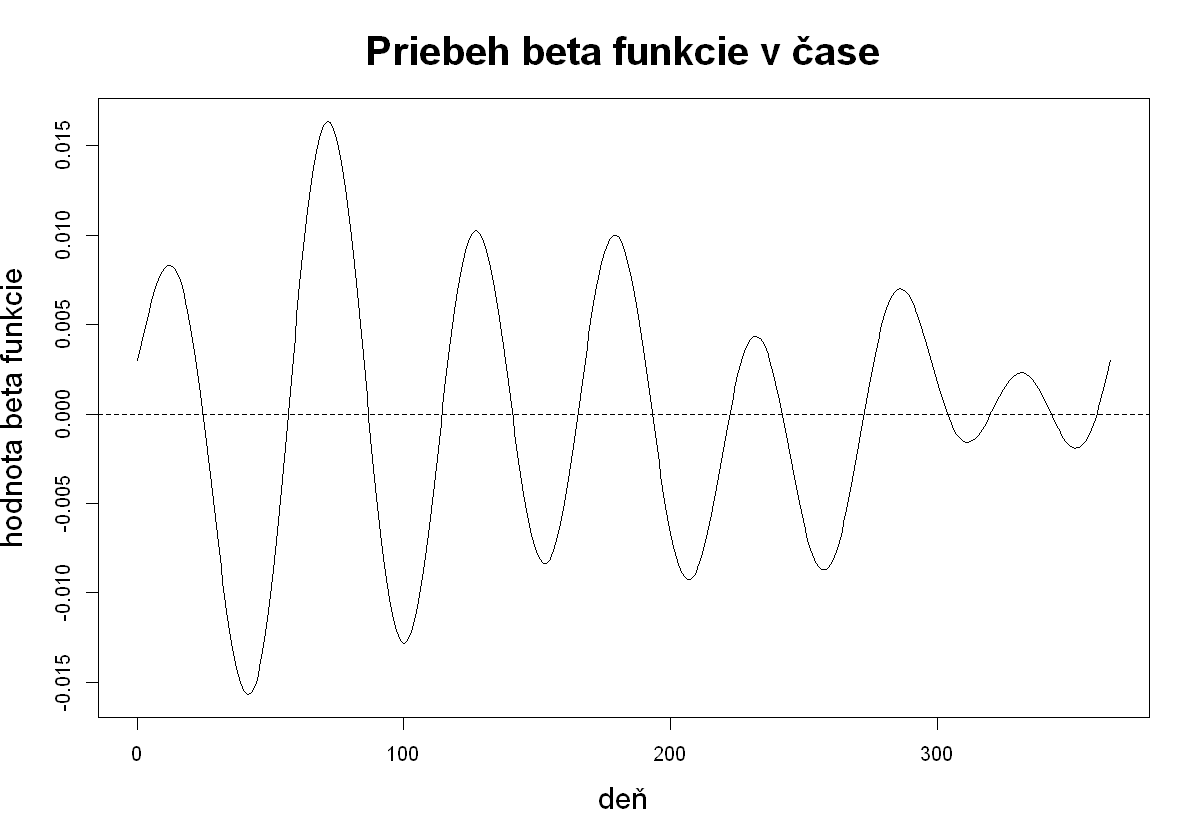

In [343]:
# vykreslime si priebeh beta funkcie
betaestlist<-fRegressList$betaestlist
tempbetafd<-betaestlist[[2]]$fd
options(repr.plot.width=10, repr.plot.height=7)
plot(tempbetafd, xlab="deň",
ylab="hodnota beta funkcie", main="Priebeh beta funkcie v čase", cex.main=2, cex.lab=1.5)

Vidíme, že hodnota konštantnej funkcie je **takmer nulová** a hodnoty beta funkcie časom kolíšu, avšak pomerne **blízko nulovej hodnoty**. 

In [344]:
# vyratame si rezidua a koeficient determinacie
celkove_zrazky_odhad = fRegressList$yhatfdobj
rezidua = celkove_zrazky - celkove_zrazky_odhad
SSE1 = sum(rezidua^2)
SSE0 = sum((celkove_zrazky - mean(celkove_zrazky))^2)
RSQ1= (SSE0-SSE1)/SSE0
RSQ1

[1] 0.9153581

**Koeficient determinácie**, ktorý meria kvalitu modelu udáva hodnotu **91,53%**, čo hovorí o percentuálnom vysvetlení rozptylu závislej premennej (celkových log. zrážok jednotlivých staníc) modelom. 

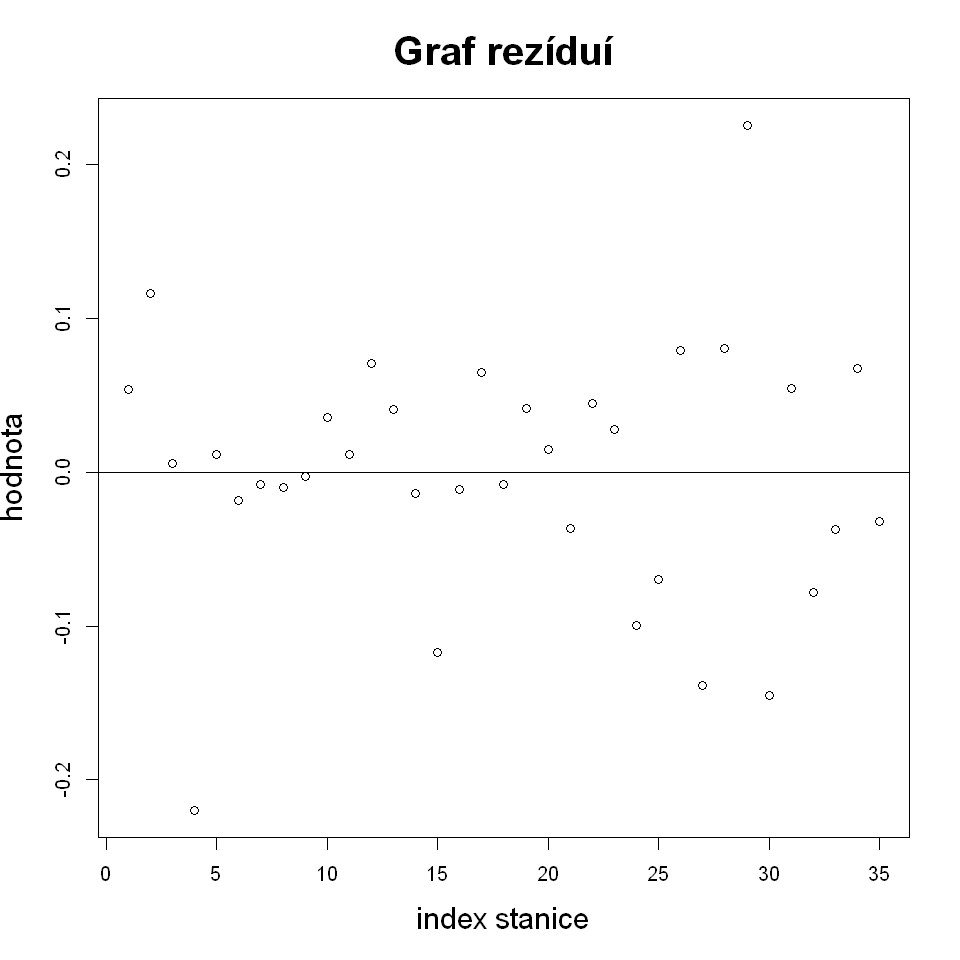

In [345]:
options(repr.plot.width=8, repr.plot.height=8)
plot(rezidua, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

Vzhľadom na to, že naše odhadované hodnoty sú skaláry (jedno číslo), nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí (ako časový rad). Môžeme nanajvýš vykresliť rozdiel medzi nameranou a odhadovanou hodnotou. 

**<font size=4 color=darkgreen> 2.2 Odhad pomocou penalizácie funkcie $\beta$ </font>** <br>

V prípade, že odhad nie je príliš vyhladený, môžeme vykonať **penalizáciu odhadu funkcie** $\beta(t)$, kde hľadáme optimálnu hodnotu $\lambda$ penalizovaného reziduálneho súčtu štvorcov

$$ P_{\lambda}(\alpha,\beta) = \sum_{i=1}^{N}\left[Y_i -\alpha -\int z_i(s)\beta(s)ds \right]^2 + \lambda\int\left[ L\beta(s)\right]^2ds.$$ 

Opäť využijeme funkciu `fRegress()` z balíka *fda* (Ramsay a kol., 2022). Aj tentoraz budú vstupom funkcionáne objekty. 

In [346]:
p <- 2
# jednoriadkova "bazicka" matica 1tiek 
konstanta_fd <- fd(matrix(1,1,35), create.constant.basis(c(0, 365)))

# ulozenie regresorov do vektora ako listy
regresory_fd_list <- vector("list",2)
regresory_fd_list[[1]] <- konstanta_fd
regresory_fd_list[[2]] <- daytempfd[1:35]

Použijeme **penalizované vyhladenie** s hodnotami parametra $\lambda = 10$ a s 35 funkciami v báze, ktoré navrhuje Ramsay a kol. (2009). 

In [347]:
#koeficienty regresorov su opat ulozime ako "funkcionalne listy" funkcii s danymi parametrami
koeficienty_list <- vector("list",2)

# vytvorenie konstantnej regresnej funkcie
beta_baza1 <- create.constant.basis(c(0, 365))
betafd1    <- fd(0, beta_baza1)
betafdPar1 <- fdPar(betafd1)
koeficienty_list[[1]] <- betafdPar1

#  vytvorenie beta regresnej funckie 
beta_pocet_baz  <- 35
beta_baza2  <- create.fourier.basis(c(0, 365), beta_pocet_baz)
betafd2     <- fd(matrix(0,beta_pocet_baz,1), beta_baza2)
lambda      <- 10
betafdPar2  <- fdPar(betafd2, linearny_diff_operator, lambda)
koeficienty_list[[2]] <- betafdPar2

In [348]:
# vykoname samotnu regresiu 
SnF <- fRegress(celkove_zrazky, regresory_fd_list, koeficienty_list)

[1] "done"

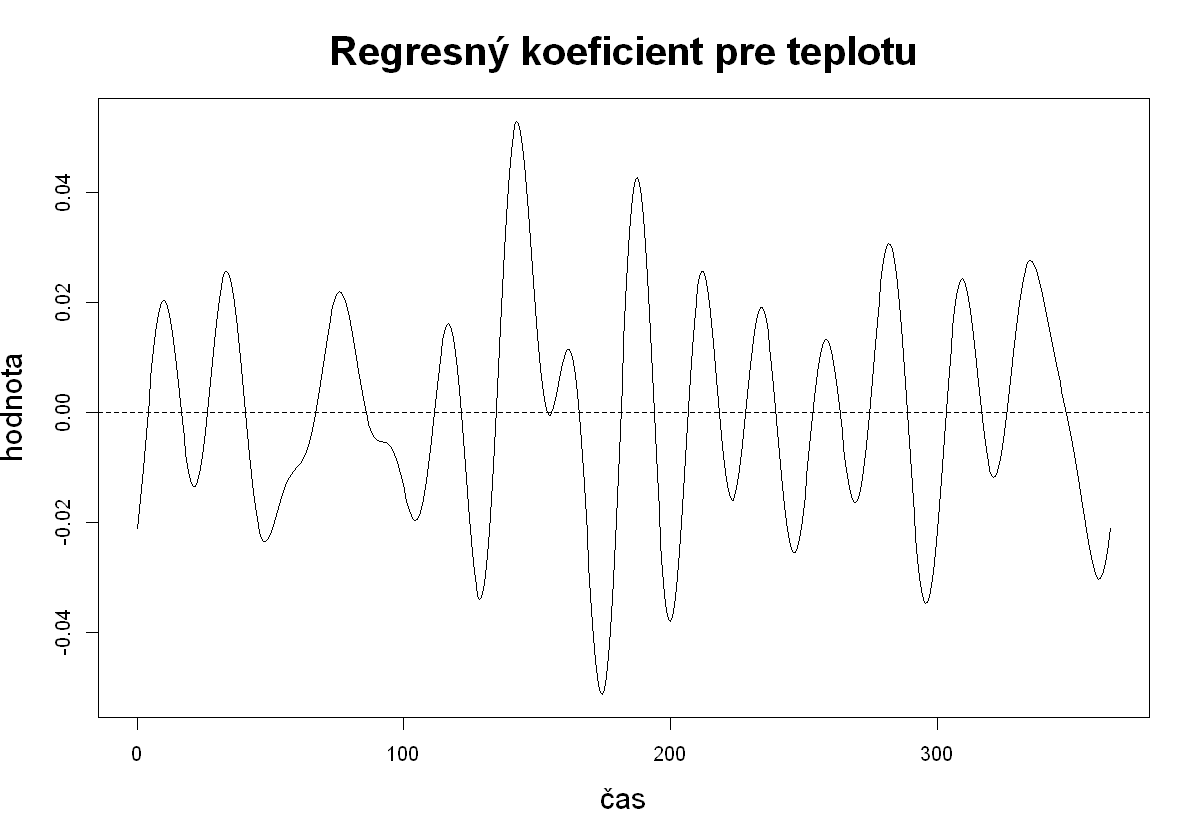

In [349]:
# vykreslime si priebeh beta regresnej funkcie 
beta_list_odhad   <- SnF$betaestlist
celkove_zrazky_odhad <- SnF$yhatfdobj
betafdPar <- beta_list_odhad[[2]]
betafd    <- betafdPar$fd
par(mfrow=c(1,1), pty="m")
options(repr.plot.width=10, repr.plot.height=7)
plot(betafd,main="Regresný koeficient pre teplotu", cex.main=2, cex.lab=1.5, xlab="čas", ylab="hodnota")

Hodnoty **beta funkcie** opäť kolíšu okolo **nuly**.

In [350]:
# vyratame si rezidua a koeficient determinacie modelu
celkove_zrazky_odhad = SnF$yhatfdobj
rezidua2 = celkove_zrazky - celkove_zrazky_odhad
SSE2 = sum(rezidua2^2)
SSE02 = sum((celkove_zrazky - mean(celkove_zrazky))^2)
RSQ2= (SSE02-SSE2)/SSE02
RSQ2

[1] 0.9999984

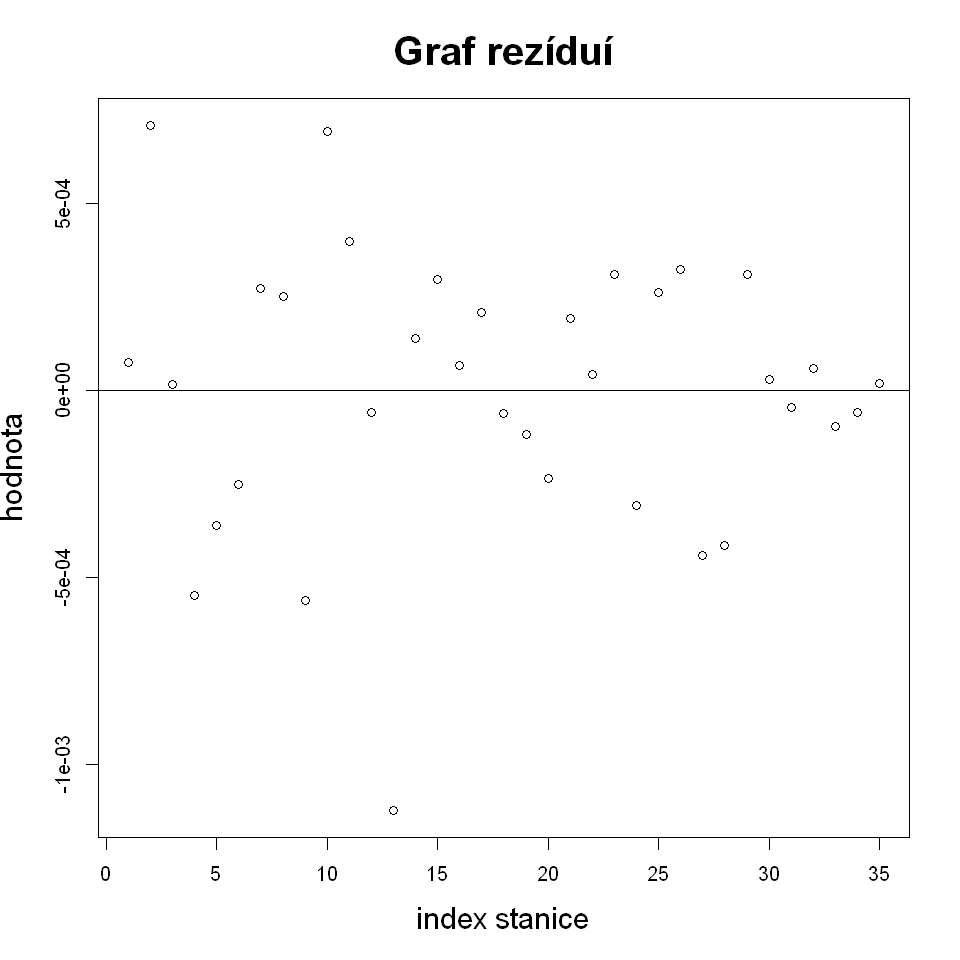

In [351]:
options(repr.plot.width=8, repr.plot.height=8)
plot(rezidua2, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

**Koeficient determinácie** modelu udáva hodnotu **takmer 100%**. Opäť sú naše odhadované hodnoty sú skaláry (jedno číslo), nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí (ako časový rad).

**<font size=4 color=darkgreen> Výber optimálneho parametra $\lambda$ </font>** <br>

Pri výbere hodnoty parametra penalizácie by nás mohlo zaujímať, akým spôsobom vybrať tu optimálnu. Môžeme použiť už známu metódu **krížovej validácie** (angl. *cross-validation*), resp. jej **zovšeobecnenú** verziu (*GCV*). Jej podstatu sme už popísali v predchádzajúcich jupyter notebookoch.

In [352]:
# implementacia GCV metody
loglam <- seq(5,15,0.5)
nlam   <- length(loglam)
SSE.CV <- matrix(0,nlam,1)
for (ilam in 1:nlam) {
  lambda       <- 10^loglam[ilam]
  betalisti    <- koeficienty_list
  betafdPar2   <- betalisti[[2]]
  betafdPar2$lambda <- lambda
  betalisti[[2]] <- betafdPar2
  SSE.CV[ilam]   <- fRegress.CV(celkove_zrazky, regresory_fd_list, betalisti)
  print(c(ilam, loglam[ilam], SSE.CV[ilam]))
}

Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 1

[[2]]
[1] 5

[[3]]
[1] 1.764885



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 2

[[2]]
[1] 5.5

[[3]]
[1] 1.484848



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 3

[[2]]
[1] 6

[[3]]
[1] 1.356805



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 4

[[2]]
[1] 6.5

[[3]]
[1] 1.349418



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 5

[[2]]
[1] 7

[[3]]
[1] 1.350799



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 6

[[2]]
[1] 7.5

[[3]]
[1] 1.320065



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 7

[[2]]
[1] 8

[[3]]
[1] 1.305756



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 8

[[2]]
[1] 8.5

[[3]]
[1] 1.363377



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 9

[[2]]
[1] 9

[[3]]
[1] 1.508696



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 10

[[2]]
[1] 9.5

[[3]]
[1] 1.609399



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 11

[[2]]
[1] 10

[[3]]
[1] 1.551203



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 12

[[2]]
[1] 10.5

[[3]]
[1] 1.409017



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 13

[[2]]
[1] 11

[[3]]
[1] 1.274142



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 14

[[2]]
[1] 11.5

[[3]]
[1] 1.163534



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 15

[[2]]
[1] 12

[[3]]
[1] 1.087918



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 16

[[2]]
[1] 12.5

[[3]]
[1] 1.076148



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 17

[[2]]
[1] 13

[[3]]
[1] 1.106569



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 18

[[2]]
[1] 13.5

[[3]]
[1] 1.132244



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 19

[[2]]
[1] 14

[[3]]
[1] 1.14367



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 20

[[2]]
[1] 14.5

[[3]]
[1] 1.147722



Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"


[[1]]
[1] 21

[[2]]
[1] 15

[[3]]
[1] 1.149052



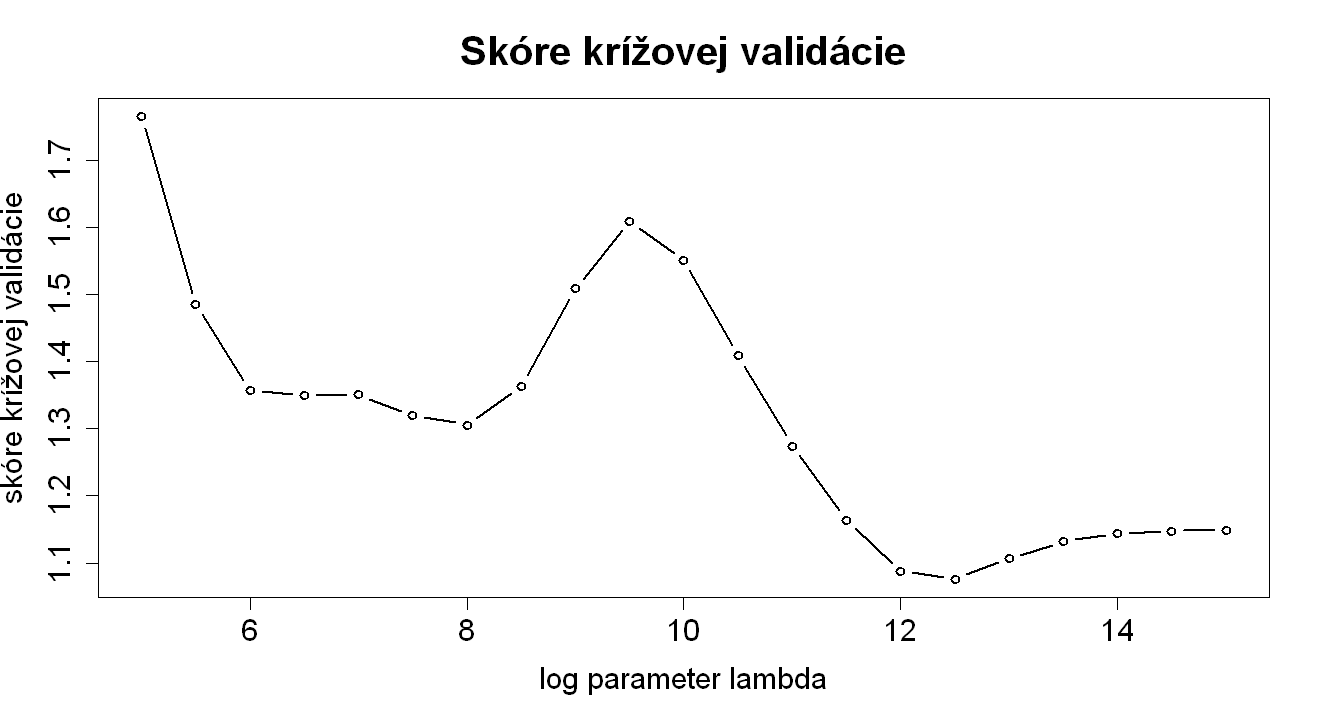

In [353]:
options(repr.plot.width=11, repr.plot.height=6)
plot(loglam, SSE.CV, type="b",
     xlab="log parameter lambda",
     ylab="skóre krížovej validácie",cex.lab=1.5,cex.axis=1.5,lwd=2, main="Skóre krížovej validácie", cex.main=2)

Pre $\lambda = 10^{12.5}$ máme optimálne CV skóre, preto teraz zopakujeme celý proces regresie a porovnáme výsledky s hodnotou $\lambda = 10$.

In [354]:
lambda        <- 10^12.5
betafdPar2    <- fdPar(betafd2, linearny_diff_operator, lambda)
koeficienty_list[[2]] <- betafdPar2

SnF2 <- fRegress(celkove_zrazky, regresory_fd_list, koeficienty_list)

beta_list_odhad   <- SnF2$betaestlist
celkove_zrazky_odhad <- SnF2$yhatfdobj
betafdPar <- beta_list_odhad[[2]]
betafd    <- betafdPar$fd

[1] "done"

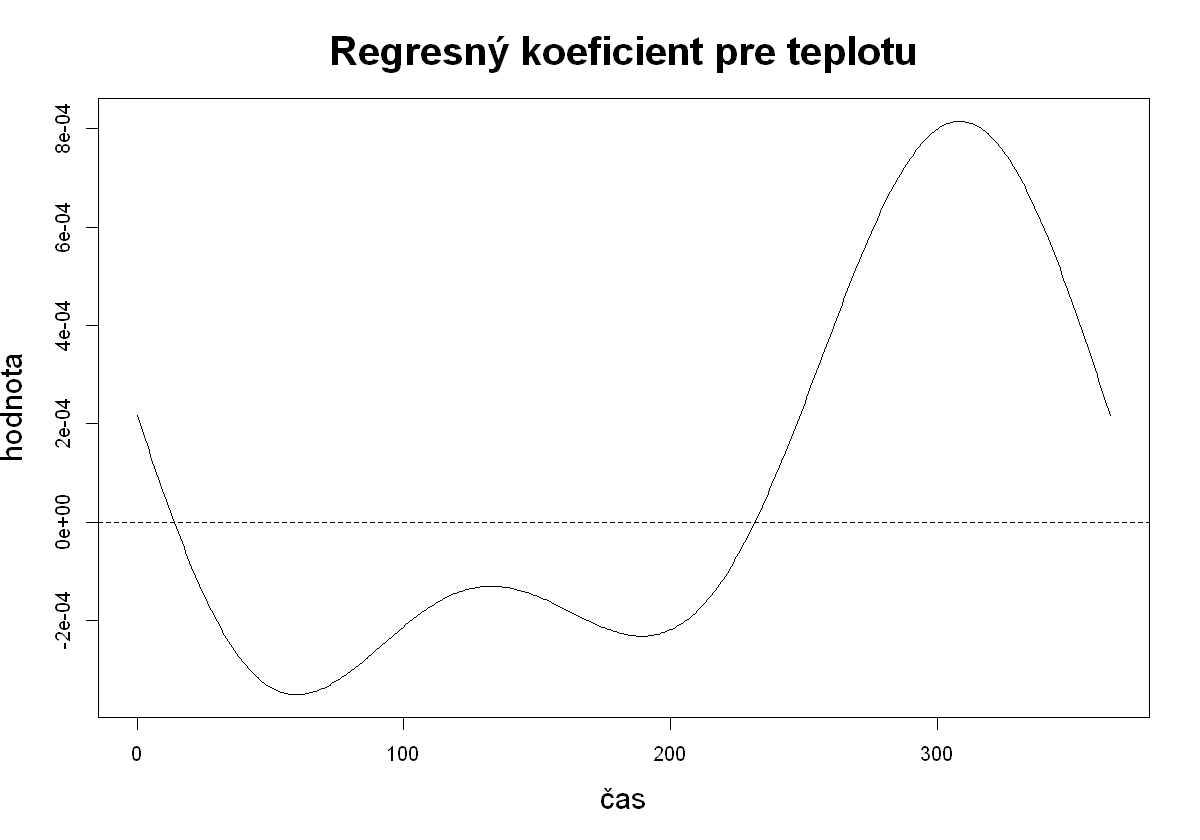

In [355]:
options(repr.plot.width=10, repr.plot.height=7)
plot(betafd,main="Regresný koeficient pre teplotu", cex.main=2, cex.lab=1.5, xlab="čas", ylab="hodnota")

In [356]:
celkove_zrazky_odhad2<-SnF2$yhatfdobj
rezidua3<-celkove_zrazky - celkove_zrazky_odhad2
SSE22<-sum(rezidua3^2)
SSE022<-sum((celkove_zrazky - mean(celkove_zrazky))^2)
RSQ22<-(SSE022-SSE22)/SSE022
RSQ22

[1] 0.7537658

[1] "done"

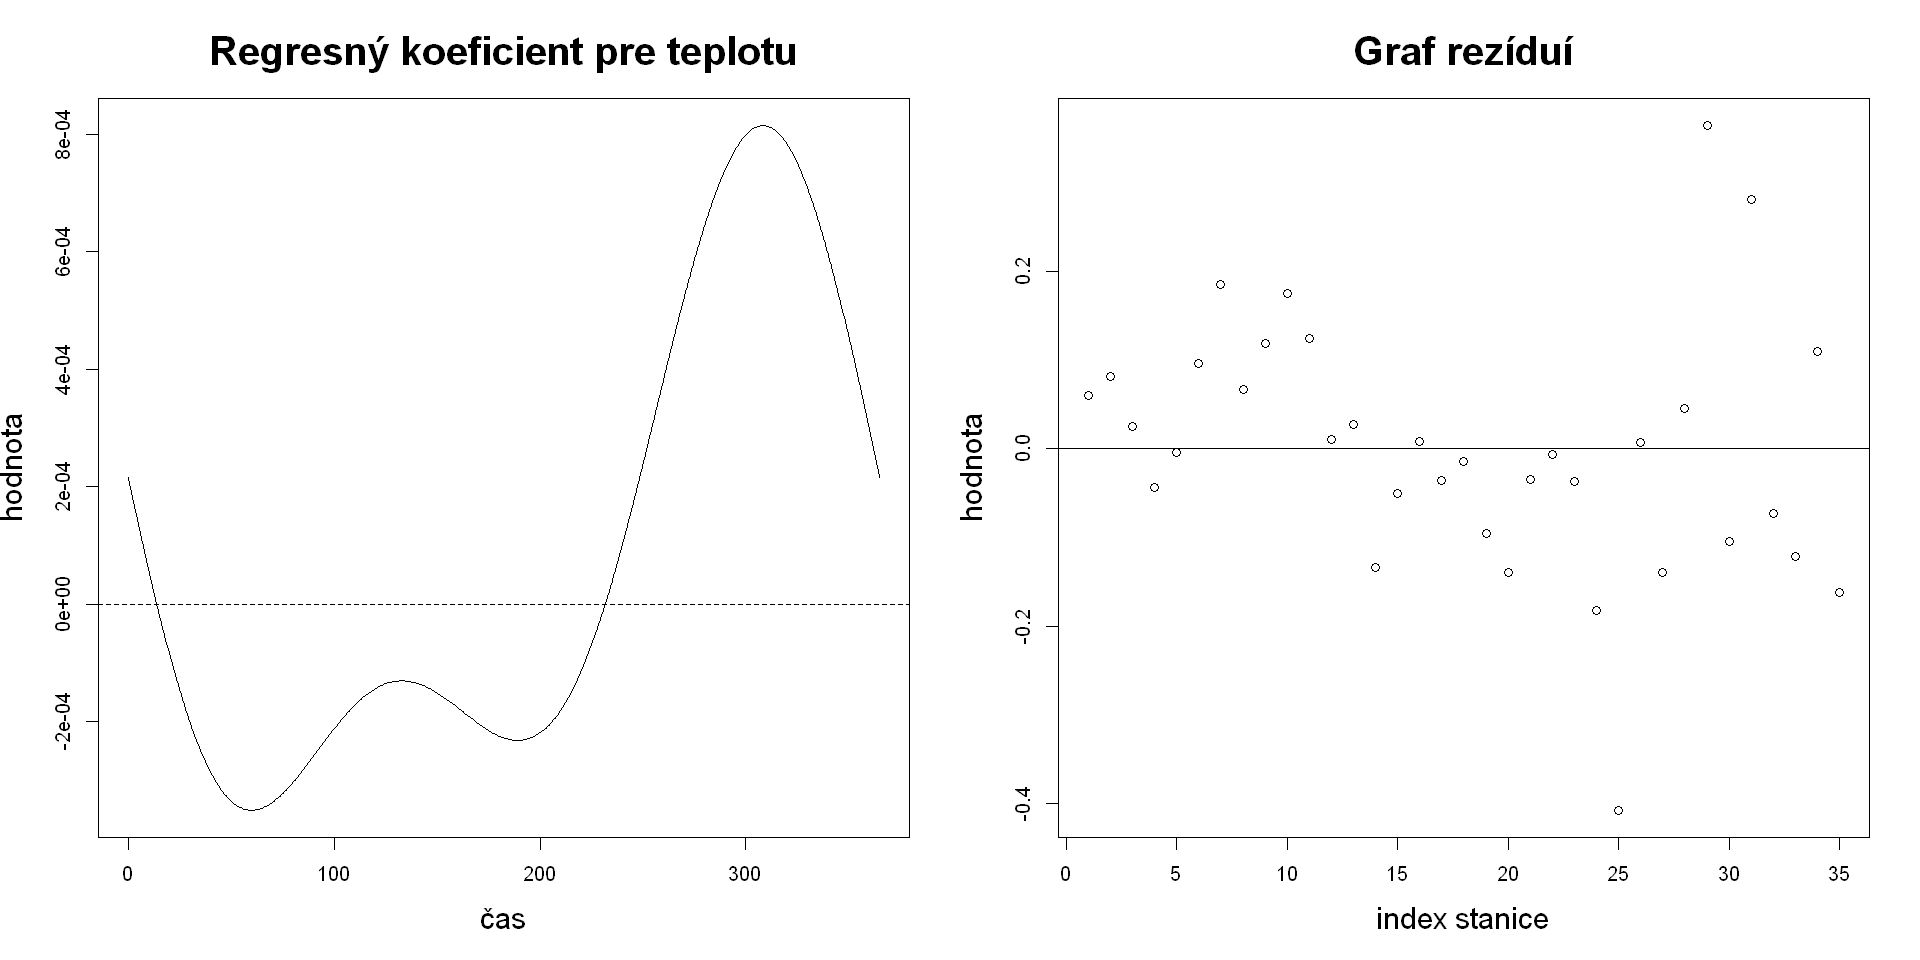

In [357]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
plot(betafd,main="Regresný koeficient pre teplotu", cex.main=2, cex.lab=1.5, xlab="čas", ylab="hodnota")
plot(rezidua3, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

Hoci **beta funkcia** je **viac vyhladená**, **koeficient determinácie** má hodnotu **75,38%**. Naďalej platí, že nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí.

**<font size=4 color=darkgreen> 2.3 Odhad funkcie $\beta$ pomocou funkcionálnych hlavných komponentov</font>** <br>

Problém nájdenia minima beta funkcie zavŕšime tretím riešením, odhadom beta funkcie pomocou skóre FCPA. 

Využijeme aproximácie $$X_i(t) \approx \hat{\mu}(t) + \sum_{j=1}^{p} \hat{\xi}_{ij}\hat{v}_j(t)\qquad a \qquad \hat{\xi}_{ij} = \int \left[ X_i(t) - \hat{\mu}(t) \right]\hat{v}_j(t)dt.$$ 

Model sa teda redukuje na 
\begin{split}
		Y_i
		& = \alpha + \int\beta(t) \left( \hat{\mu}(t)+\sum_{j=1}^{p}\hat{\xi}_{ij}\hat{v}_j(t)\right) dt +\epsilon_i, \\
		& = \beta_0 +\sum_{j=1}^{p}\hat{\xi}_{ij}\beta_j + \epsilon_i,
	\end{split}
kde
$$ \beta_0 = \alpha + \int \beta(t)\hat{\mu}(t)dt \qquad a \qquad \beta_j = \int \beta(t)\hat{v}_j(t)dt$$

sa považujú za neznáme parametre. Za regresory vezmeme skóre vybraných funkcionálnych hlavných komponentov. 

[1] "done"

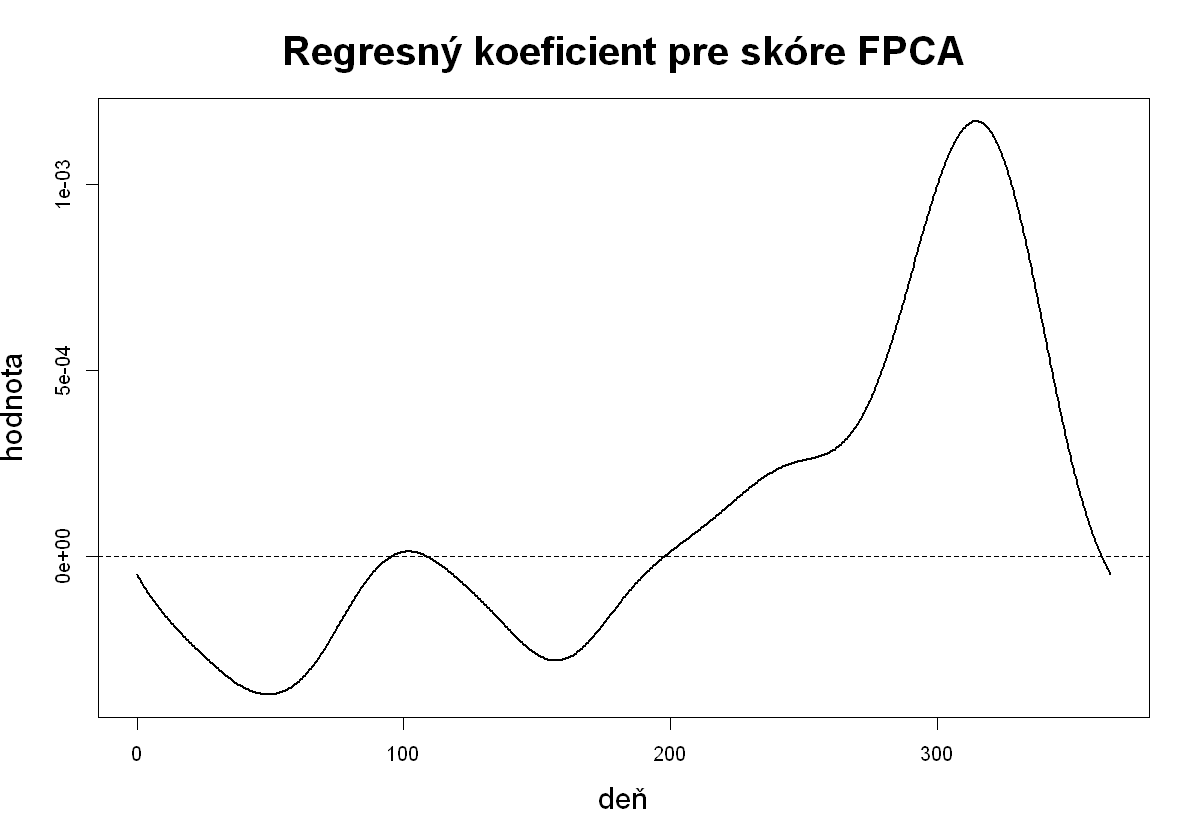

In [358]:
# vyuzijeme vysledky z fpca po rotacii VARIMAX 
harmonics<-daytemppcaobjVM$harmonics

# Ramsay a kol. (2009) vykonava jednoduchy regresny model pre tento pripad, avsak s naslednym dopocitanim beta funkcie
pcamodel<-lm(celkove_zrazky~daytemppcaobjVM$scores)
pcacoefs<-summary(pcamodel)$coef

# kazde skore komponentu vynasobime s prislusnym odhadovanym koeficientom
betafd<-pcacoefs[2,1]*harmonics[1] +pcacoefs[3,1]*harmonics[2] +pcacoefs[4,1]*harmonics[3]
options(repr.plot.width=10, repr.plot.height=7)
plot(betafd, xlab="deň", ylab="hodnota",main="Regresný koeficient pre skóre FPCA", cex.main=2, cex.lab=1.5, lwd=2)

In [359]:
summary(pcamodel)


Call:
lm(formula = celkove_zrazky ~ daytemppcaobjVM$scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39686 -0.07941 -0.01693  0.06823  0.36386 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.902e-16  2.520e-02   0.000    1.000    
daytemppcaobjVM$scoresPCA.1 -1.163e-03  1.380e-03  -0.843    0.406    
daytemppcaobjVM$scoresPCA.2  1.435e-03  1.443e-03   0.994    0.328    
daytemppcaobjVM$scoresPCA.3 -8.253e-03  1.775e-03  -4.649 6.26e-05 ***
daytemppcaobjVM$scoresPCA.4 -1.904e-03  1.666e-03  -1.142    0.262    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1491 on 30 degrees of freedom
Multiple R-squared:  0.757,	Adjusted R-squared:  0.7246 
F-statistic: 23.36 on 4 and 30 DF,  p-value: 7.518e-09


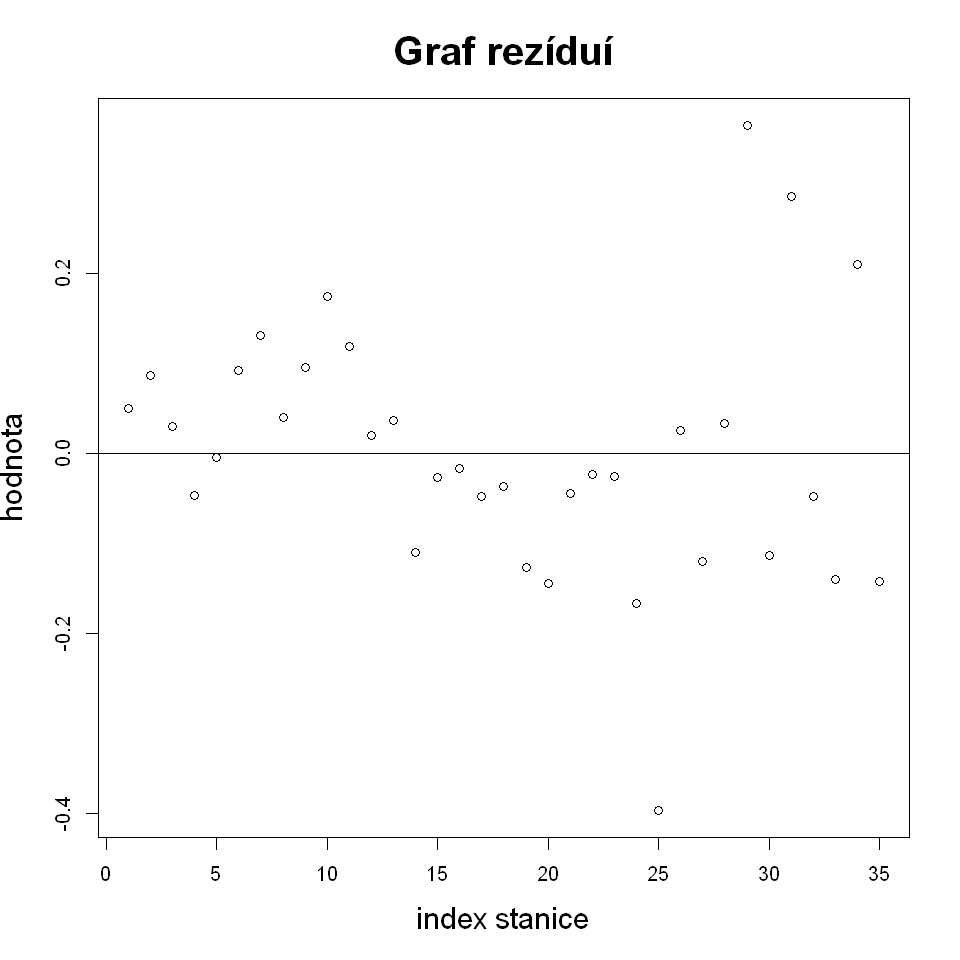

In [360]:
options(repr.plot.width=8, repr.plot.height=8)
plot(pcamodel$residuals, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

Regresný koeficient je pomerne dobre vyladený, aj keď kolíše okolo nulovej hodnoty. Naďalej platí, že nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí.

---
<a id=FnS></a>
**<font size=5 color=darkgreen> 3. Regresia s funkcionálnou odozvou a skalárnymi regresormi </font>** <br>

Regresia s **funkcionálnou** odozvou a **skalárnymi** regresormi (FnS) má tvar

$$ Y_i(t) = \sum_{k=1}^{p} x_{ik}\beta_k(t) + \epsilon_i(t). $$


Tento model odhaduje ročné teplotné profily na základe ročných celkových zrážok (v log. škále). Závislou premennou budú teplotné profily a nezávislou premennou log. celkové zrážky.

Využijeme funkciu `pffr()`, ktorej vstup je v porovnaní s predchádzajúcou implementáciou pomerne jednoduchší, menej prácny. Odpadáva ručné zadávanie parametrov $\lambda$ a vstupom je matica, resp. vektor pozorovaní a nie funkcionálny objekt triedy `fd()`, alebo `fdPar()` s typom bázy, počtom funkcií v nej a intervalom pozorovania. Tieto parametre funkcia vypočíta sama (na základe nami zvolenej, alebo prednastavenej metódy). Viac detailov nájdeme v jej dokumentácií (https://rdrr.io/cran/refund/man/pffr.html}{https://rdrr.io/cran/refund/man/pffr.html). 

In [361]:
day <- 1:365
# za odozvy vezmeme maticu teplot a za regresory vektor celkovych zrazok
Y <- t(as.matrix(CanadianWeather$dailyAv[,,"Temperature.C"]-rowMeans(CanadianWeather$dailyAv[,,"Temperature.C"])))
X <- as.vector(colSums(CanadianWeather$dailyAv[,,3])) - mean(as.vector(colSums(CanadianWeather$dailyAv[,,3])))

myDat <- data.frame(X = X)
myDat$Y <- Y

In [362]:
# vykoname samotnu regresiu
fit <- pffr(Y ~ X, data = myDat)

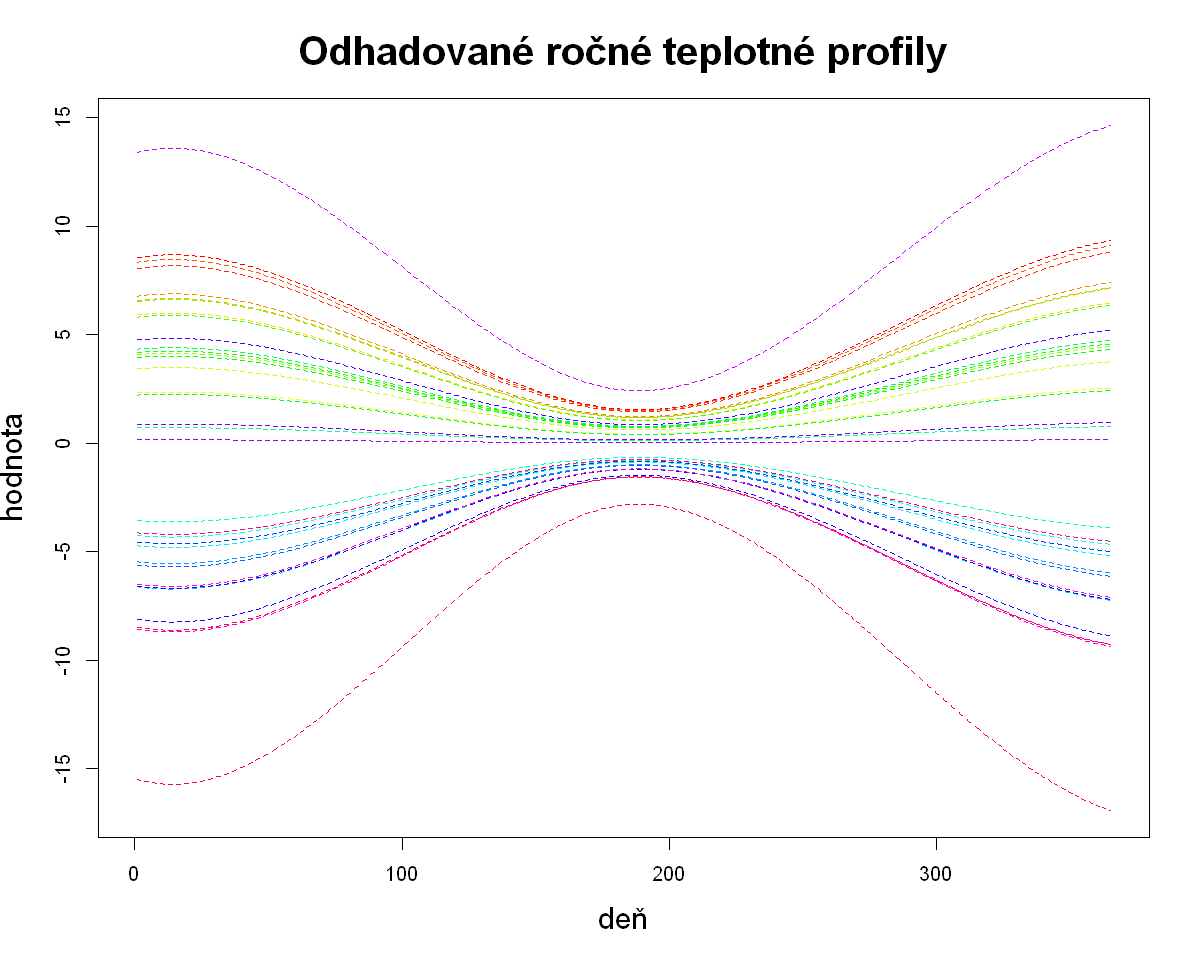

In [363]:
options(repr.plot.width=10, repr.plot.height=8)
matplot(t(fitted(fit)), type="l", xlab="deň", ylab="hodnota", main="Odhadované ročné teplotné profily"
     ,cex.main=2, cex.lab=1.5, col=rainbow(35), lty=2)

using seWithMean for  s(yindex.vec) .


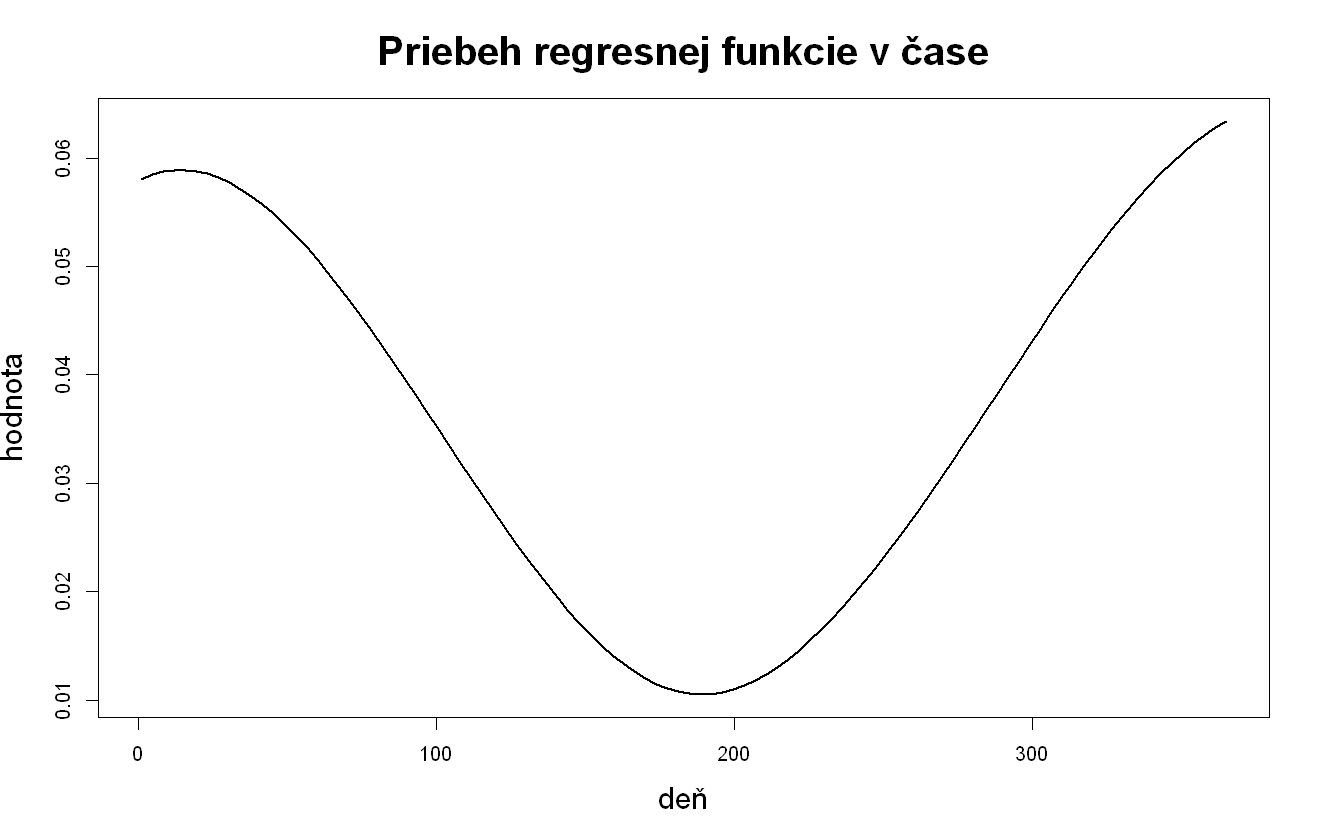

In [364]:
coef <- coef(fit)
beta1.hat <- coef$smterms$`X(yindex)`$coef
options(repr.plot.width=11, repr.plot.height=7)
plot(beta0.hat$yindex.vec, beta1.hat$value, type='l', lwd=2, xlab="deň", ylab="hodnota",
     main="Priebeh regresnej funkcie v čase",  cex.main=2, cex.lab=1.5)

Pre hodnoty **regresnej funkcie**, ktorá je hladká vidíme, že nadobúda kladné hodnoty **blízke nule**.

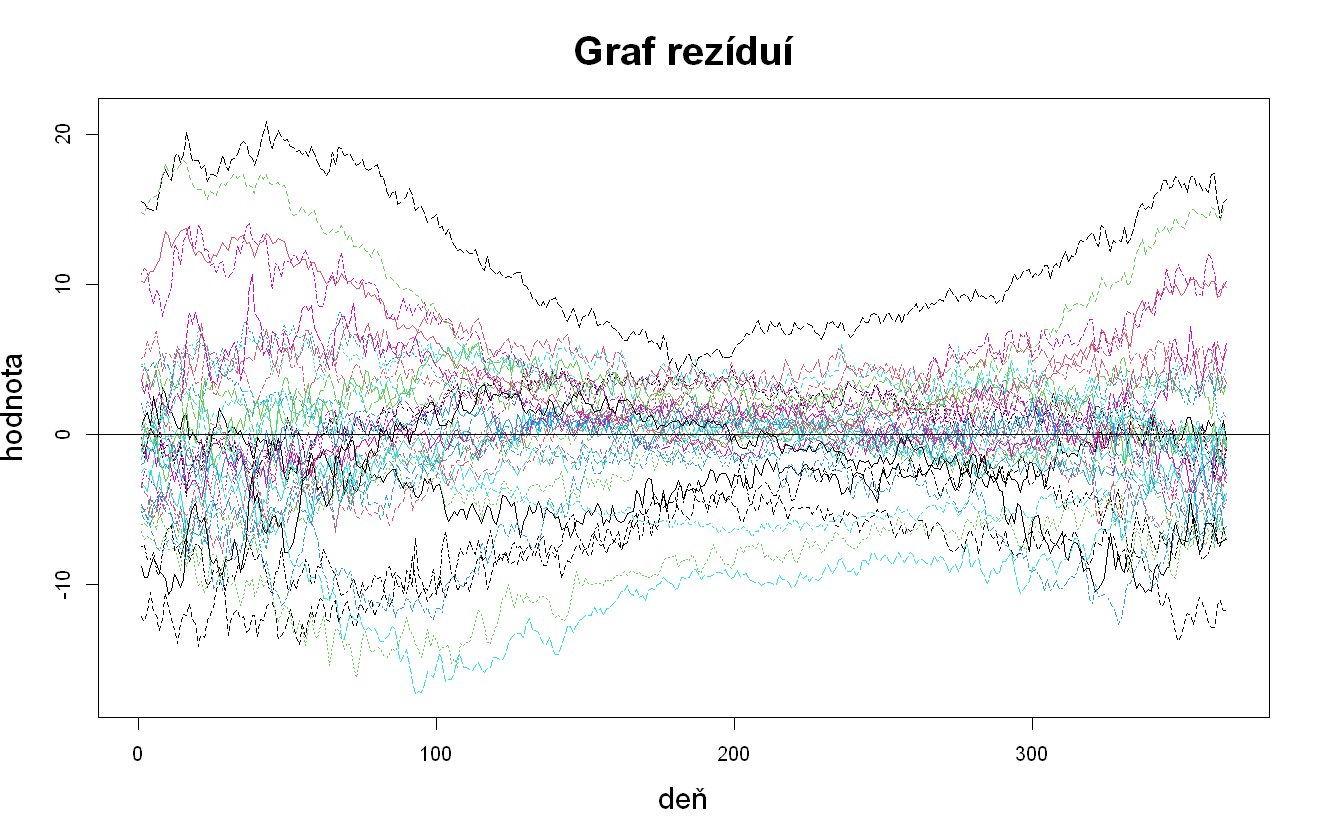

In [365]:
matplot(t(residuals(fit)), type="l", xlab="deň", ylab="hodnota", main="Graf rezíduí"
     ,cex.main=2, cex.lab=1.5 )
abline(0,0)

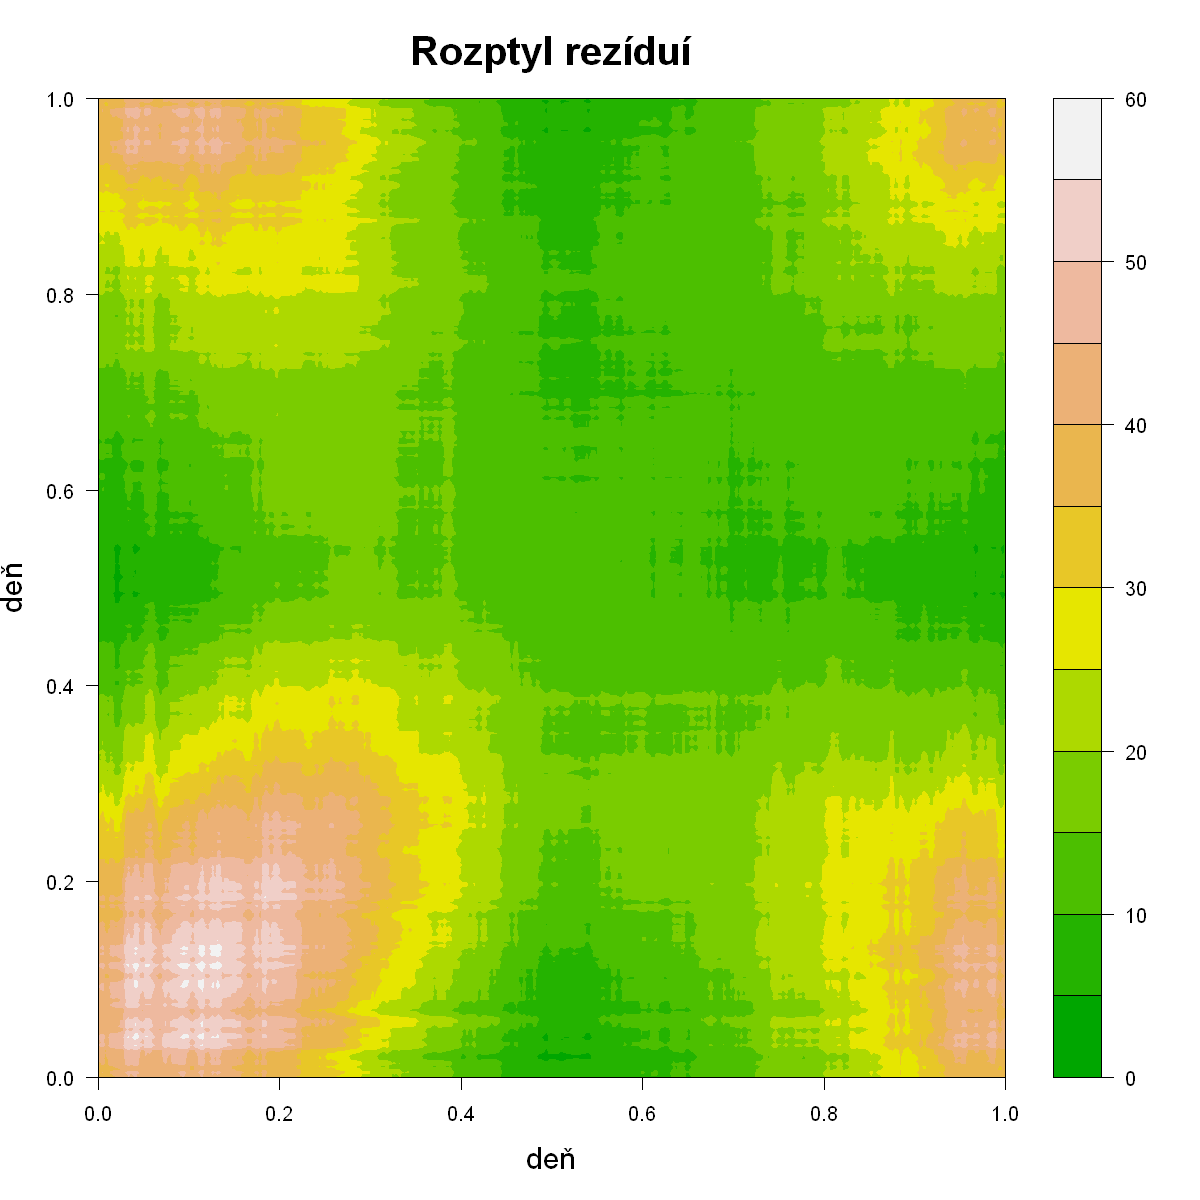

In [366]:
SigmaE   <- var(residuals(fit))
options(repr.plot.width=10, repr.plot.height=10)
filled.contour(SigmaE, xlab="deň", ylab="deň", cex.lab=1.5,color.palette = terrain.colors, 
               main="Rozptyl rezíduí", cex.main=2)

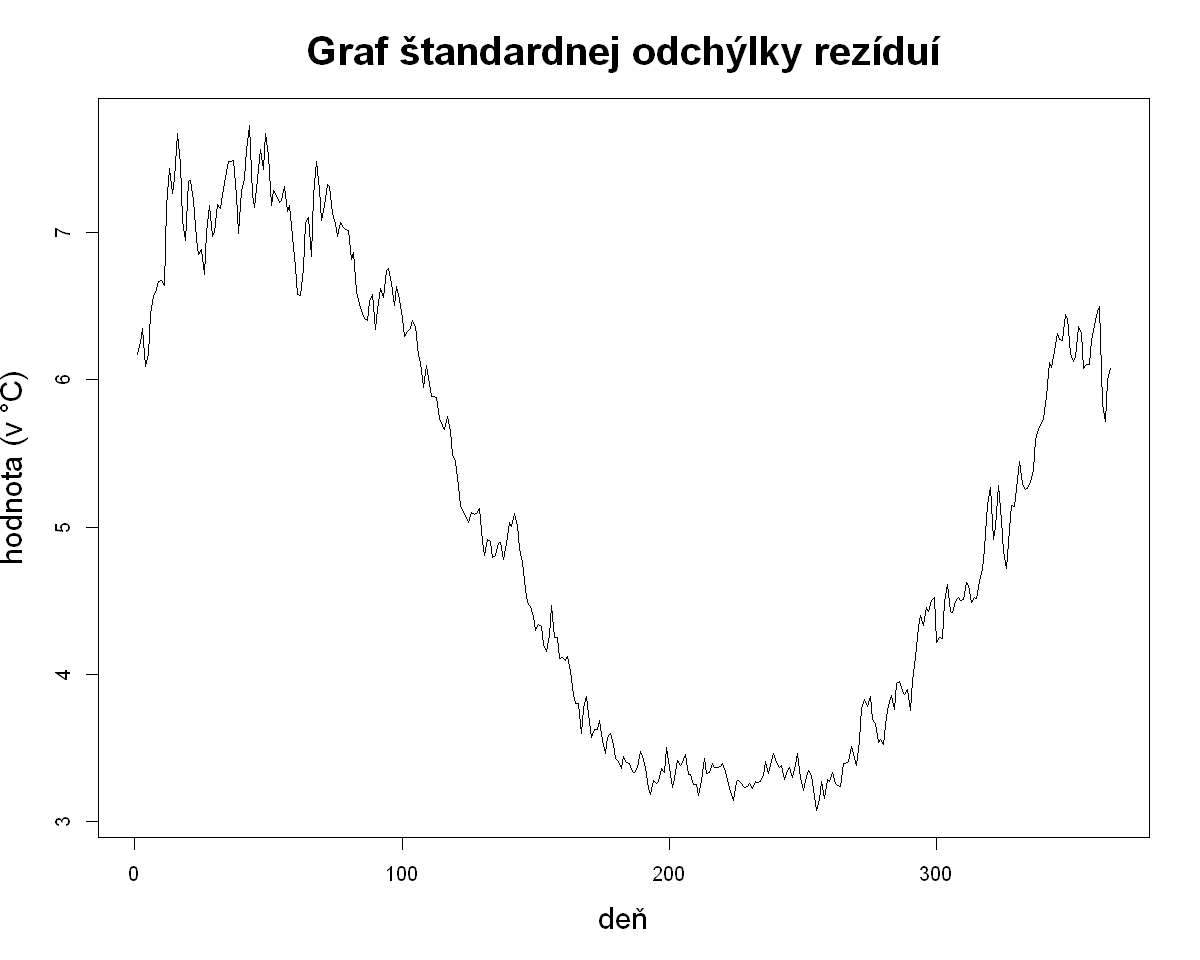

In [367]:
stddevE <- sqrt(diag(SigmaE))
options(repr.plot.width=10, repr.plot.height=8)
plot(day, stddevE, type="l",
     xlab="deň", ylab="hodnota (v °C)", main="Graf štandardnej odchýlky rezíduí"
     ,cex.main=2, cex.lab=1.5)

**Rezíduá** ťažko pomenovať náhodným šumom (ale už vieme s nimi narábať, ako časový rad).
Ich **rozptyl** nie je konštantný v čase.

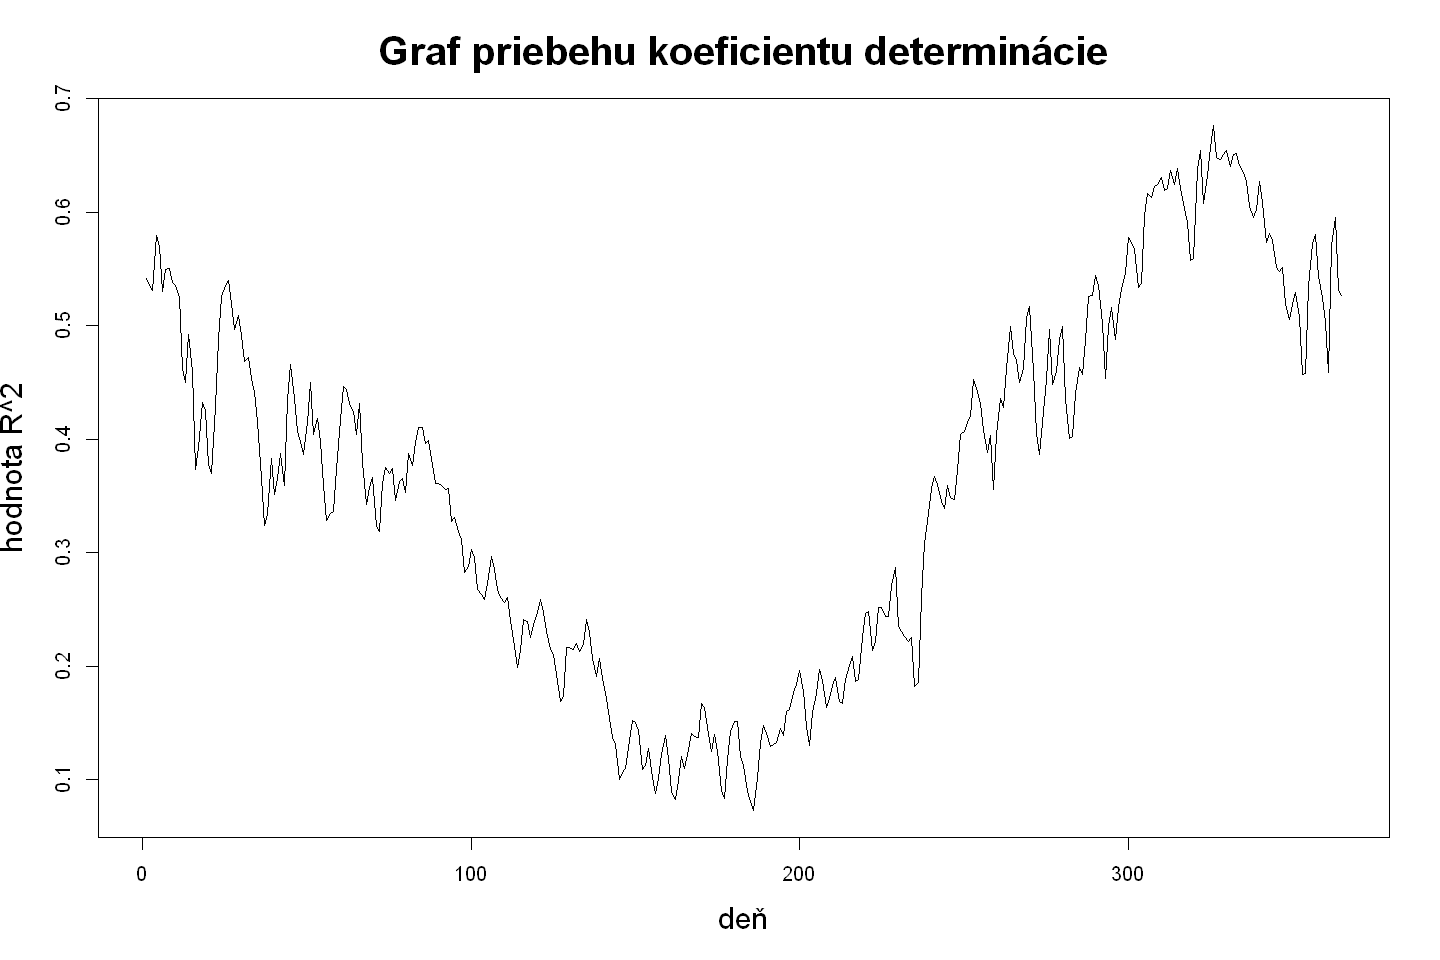

In [368]:
# vyratame si koeficient determinacie modelu, ktory ma priebeh v sledovanom case
Rsq_t <- 1-colSums((Y - fitted(fit))^2) / colSums((Y - colMeans(Y))^2)
options(repr.plot.width=12, repr.plot.height=8)
plot(Rsq_t, type="l",xlab="deň", ylab="hodnota R^2", main="Graf priebehu koeficientu determinácie"
     ,cex.main=2, cex.lab=1.5)

**Koeficient determinácie** modelu je vzhľadom na čas neustálený.

In [369]:
mshapiro.test(t(residuals(fit)))


	Multivariate Shapiro-Wilk normality test

data:  ()
W = 0.91636, p-value = 2.283e-13


**Viacrozmerný Shapirov-Wilkov** test zamieta ich normalitu (p=2,283e-13). 

---
<a id=FnF></a>
**<font size=5 color=darkgreen> 4. Regresia s funkcionánou odozvou aj regresormi </font>** <br>

Regresia s **funkcionálnou** odozvou a **funkcionálnymi** regresormi (FnF) má tvar

$$ Y_i(t) =  \int \beta(t,s) X_i(s) ds + \epsilon_i(t). $$

Tento model odhaduje ročné logaritmické profily zrážok na základe ročných teplotných profilov. Závislou premenou budú ročné logaritmické zrážky a nezávislou premennou budú ročné teplotné profily.

Zásadným rozdielom oproti predchádzajúcim modelom je to, že beta funkcia má teraz dve premenné, $s$ a $t$. V kontexte nášho príkladu to znamená, že zrážky v konkrétnom čase $t_1$ závisia od celého teplotného profilu $X_i(s)$. 

Využili sme funkciu `linmod()` z balíka *fda* (Ramsay a kol., 2022), ktorého využitie je podobne prácne, ako u funkcie `fRegress()`. 

In [370]:
# nulove zrazky si kvoli log transformacii nahradime hodnotou 0,05 mm
zrazky<- CanadianWeather$dailyAv[,,"Precipitation.mm"]
for (j in 1:35) {
  index <- zrazky[,j] == 0
  zrazky[index,j] <- 0.05}

In [371]:
# zlogaritmujeme zrazky
logzrazky <- log10(zrazky)
logzrazky<-(logzrazky)-rowMeans(logzrazky)
# vyhladime si udaje o zrazkach pomocou vyssie uvedenej bazy
logzrazky_fd <- smooth.basis(day.5, logzrazky, baza)$fd
logzrazky_fd_names <- vector("list",3)
logzrazky_fd_names[[1]] <- "čas"
logzrazky_fd_names[[2]] <- "stanica"
logzrazky_fd_names[[3]] <- "log mm"
logzrazky_fd$fdnames <- logzrazky_fd_names

In [372]:
# zavedieme si "penalizovane vyrazy" a lambdy   
xLfdobj <- linearny_diff_operator
yLfdobj <- linearny_diff_operator
xlambda <- 1e9
ylambda <- 1e7

betalist   <- vector("list",2)
# vytvorime si pre konstantny clen funkcionalny objekt 
betabaza1 <- create.constant.basis(c(0, 365))
betafd1    <- fd(0, betabaza1)
betafdPar1 <- fdPar(betafd1)
betalist[[1]] <- betafdPar1
# pre bety koeficienty si tiez vytvorime funkcionalny objekt
nbetabaza  <- 65
betabaza2  <- create.fourier.basis(c(0, 365), nbetabaza)
beta_fd2     <- bifd(matrix(0,nbetabaza,nbetabaza), betabaza2, betabaza2)
betalist[[2]] <- bifdPar(beta_fd2, Lfdobjs=linearny_diff_operator, Lfdobjt=linearny_diff_operator, lambdas=1e9, lambdat=1e7,
        estimate=TRUE)

In [373]:
# vykoname dany typ regresie pomocou funkcie linmod()
FnF <- linmod(daytempfd, logzrazky_fd, betalist )
# beta funkcia dvoch premennych
bfd <- FnF$beta1estbifd    

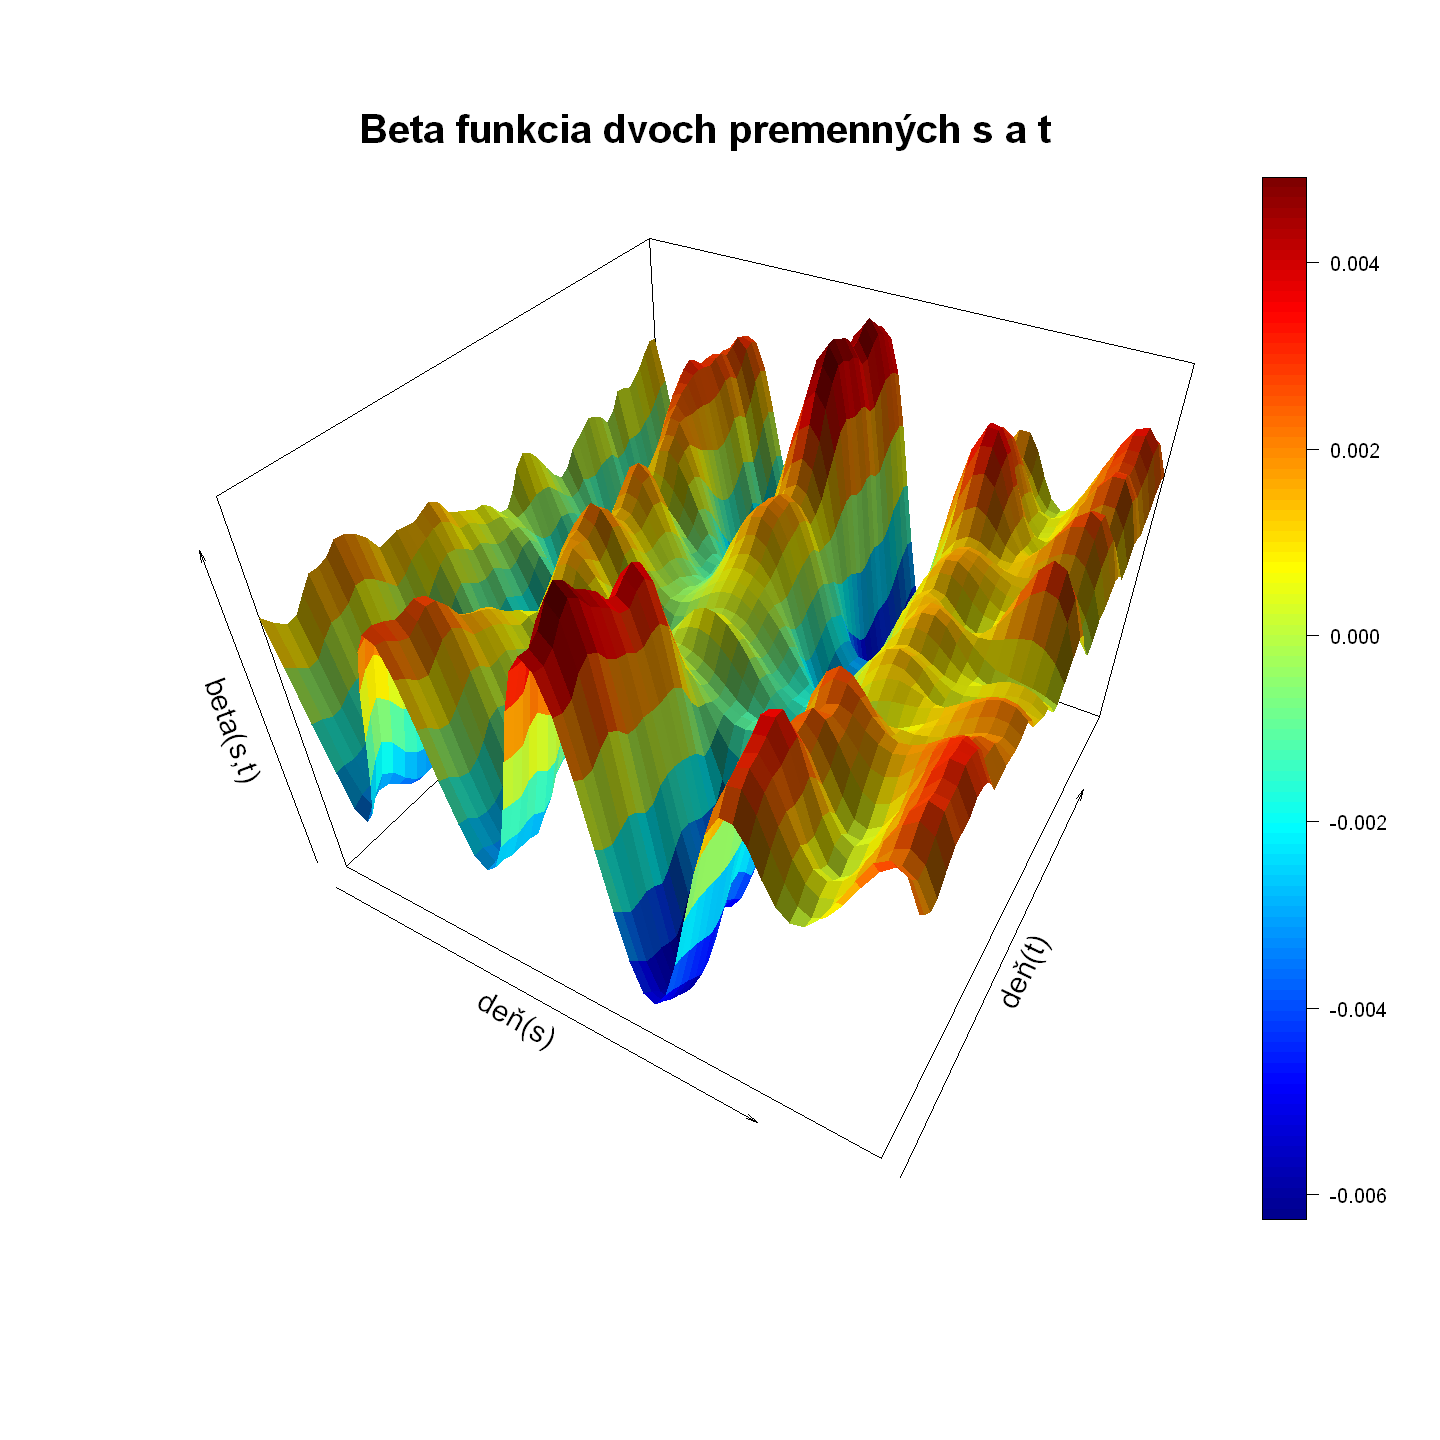

In [374]:
# vykreslime si teraz funkciu (dvoch premennych) beta v trojrozmernom priestore
bfdmapa <- eval.bifd(weeks, weeks, bfd)
options(repr.plot.width=12, repr.plot.height=12)
persp3D(weeks, weeks, bfdmapa, xlab="deň(s)", ylab="deň(t)",zlab="beta(s,t)",theta = 30, phi = 40,expand = 0.75, 
      col.palette = heat.colors,
      shade = 0.3, cex.lab=1.5,main="Beta funkcia dvoch premenných s a t", cex.main=2)

**Beta funkcia** nadobúda hodnoty blízke **nule**, avšak vzhľadom na $s$ aj $t$ **kolíšu**.

In [375]:
logzrazky_odhad <- FnF$yhatfd

logzrazky_priemer   <- eval.fd(day.5, mean.fd(logzrazky_fd))
logzrazky_fdmat    <- eval.fd(day, logzrazky_fd)
logzrazky_odhadmat <- eval.fd(day, logzrazky_odhad)

[1] "done"

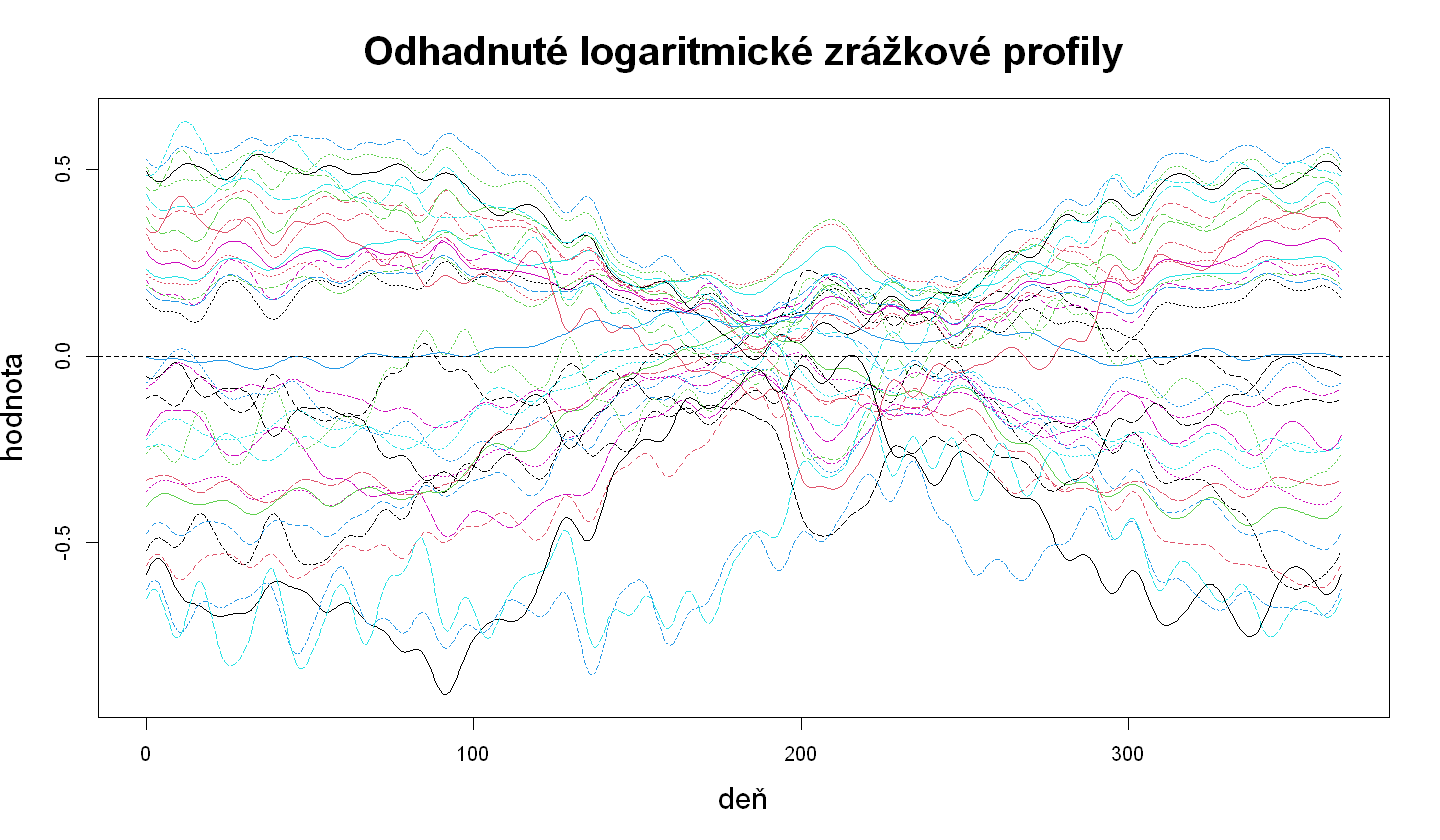

In [376]:
options(repr.plot.width=12, repr.plot.height=7)
plot(logzrazky_odhad, xlab="deň", ylab="hodnota", main="Odhadnuté logaritmické zrážkové profily", cex.main=2, cex.lab=1.5)

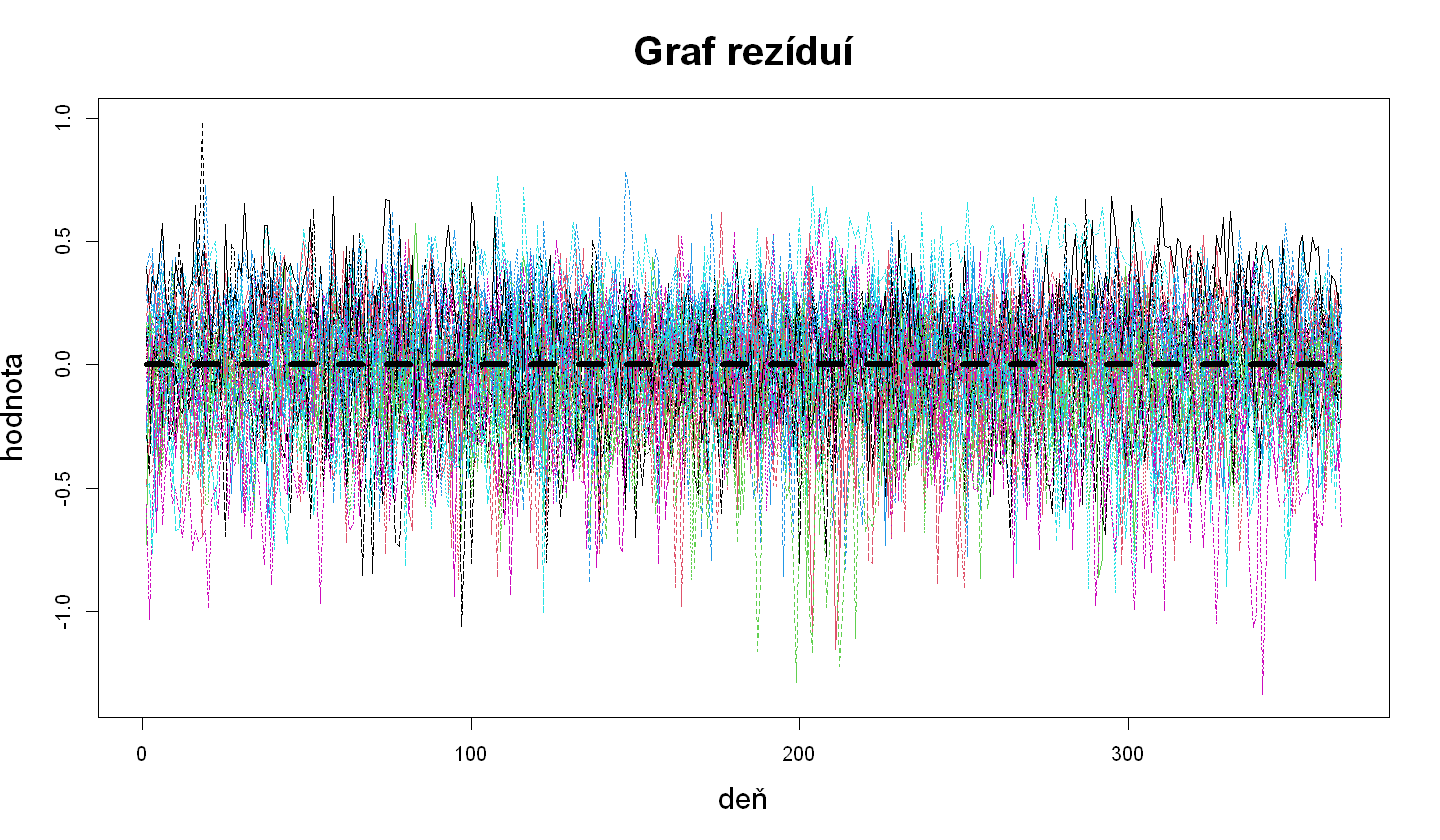

In [377]:
rezidua5<-logzrazky-logzrazky_odhadmat
matplot(day,rezidua5, type="l", main="Graf rezíduí", xlab="deň", ylab="hodnota", cex.main=2, cex.lab=1.5)
lines(rowMeans(rezidua5), lwd=5 , lty=2)

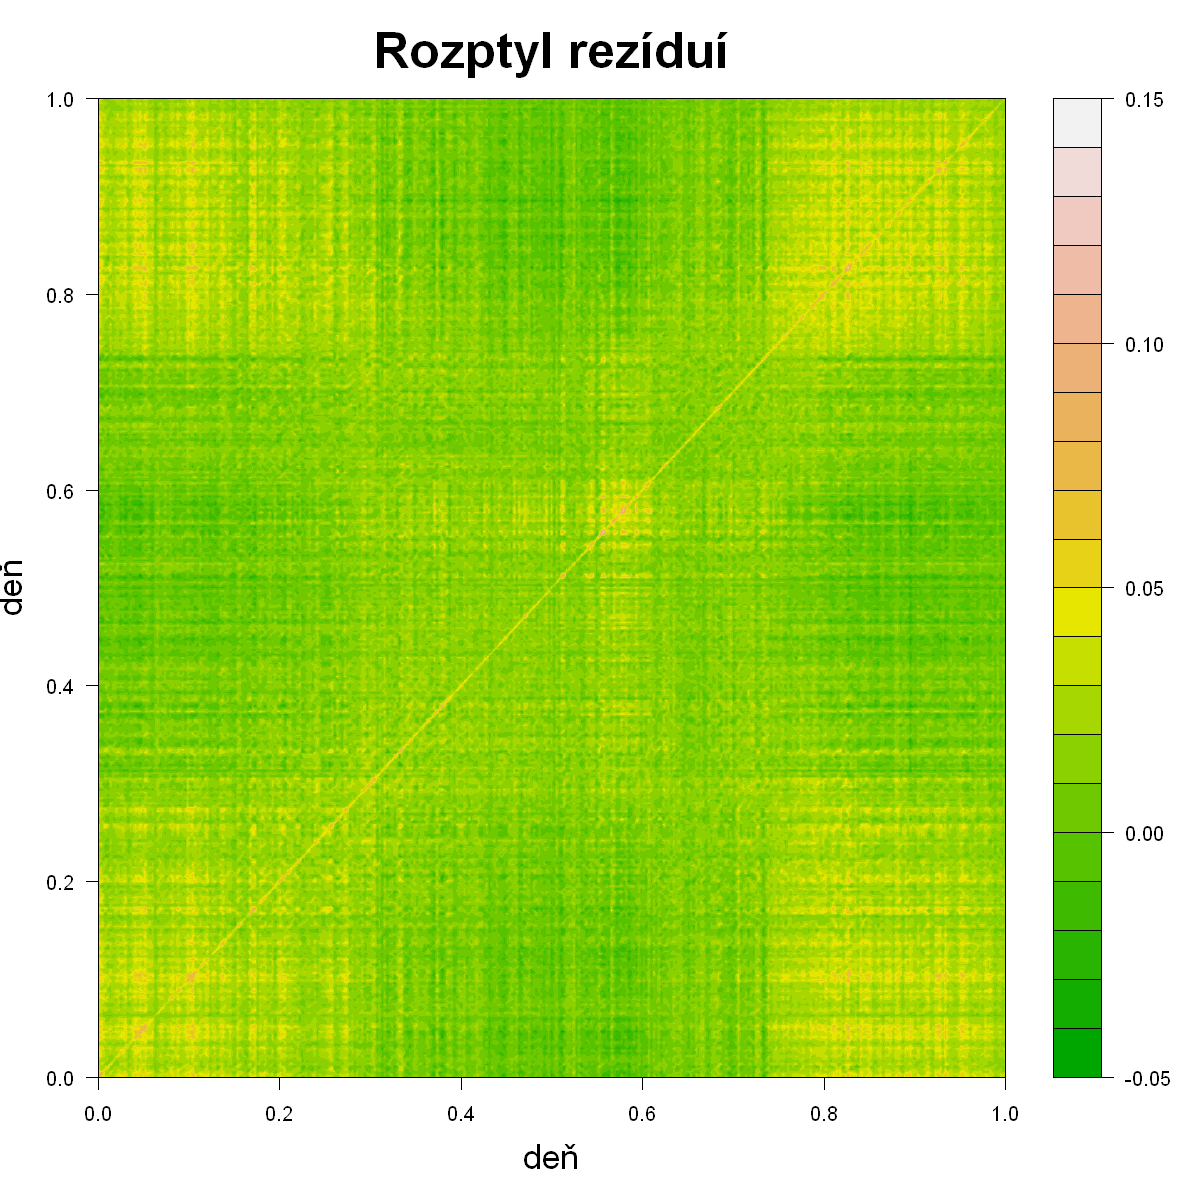

In [378]:
SigmaE5   <- var(t(rezidua5))

par(mfrow=c(1,1))
options(repr.plot.width=10, repr.plot.height=10)
filled.contour(SigmaE5, xlab="deň", ylab="deň", cex.lab=1.75,color.palette = terrain.colors, 
               main="Rozptyl rezíduí", cex.main=2.5)

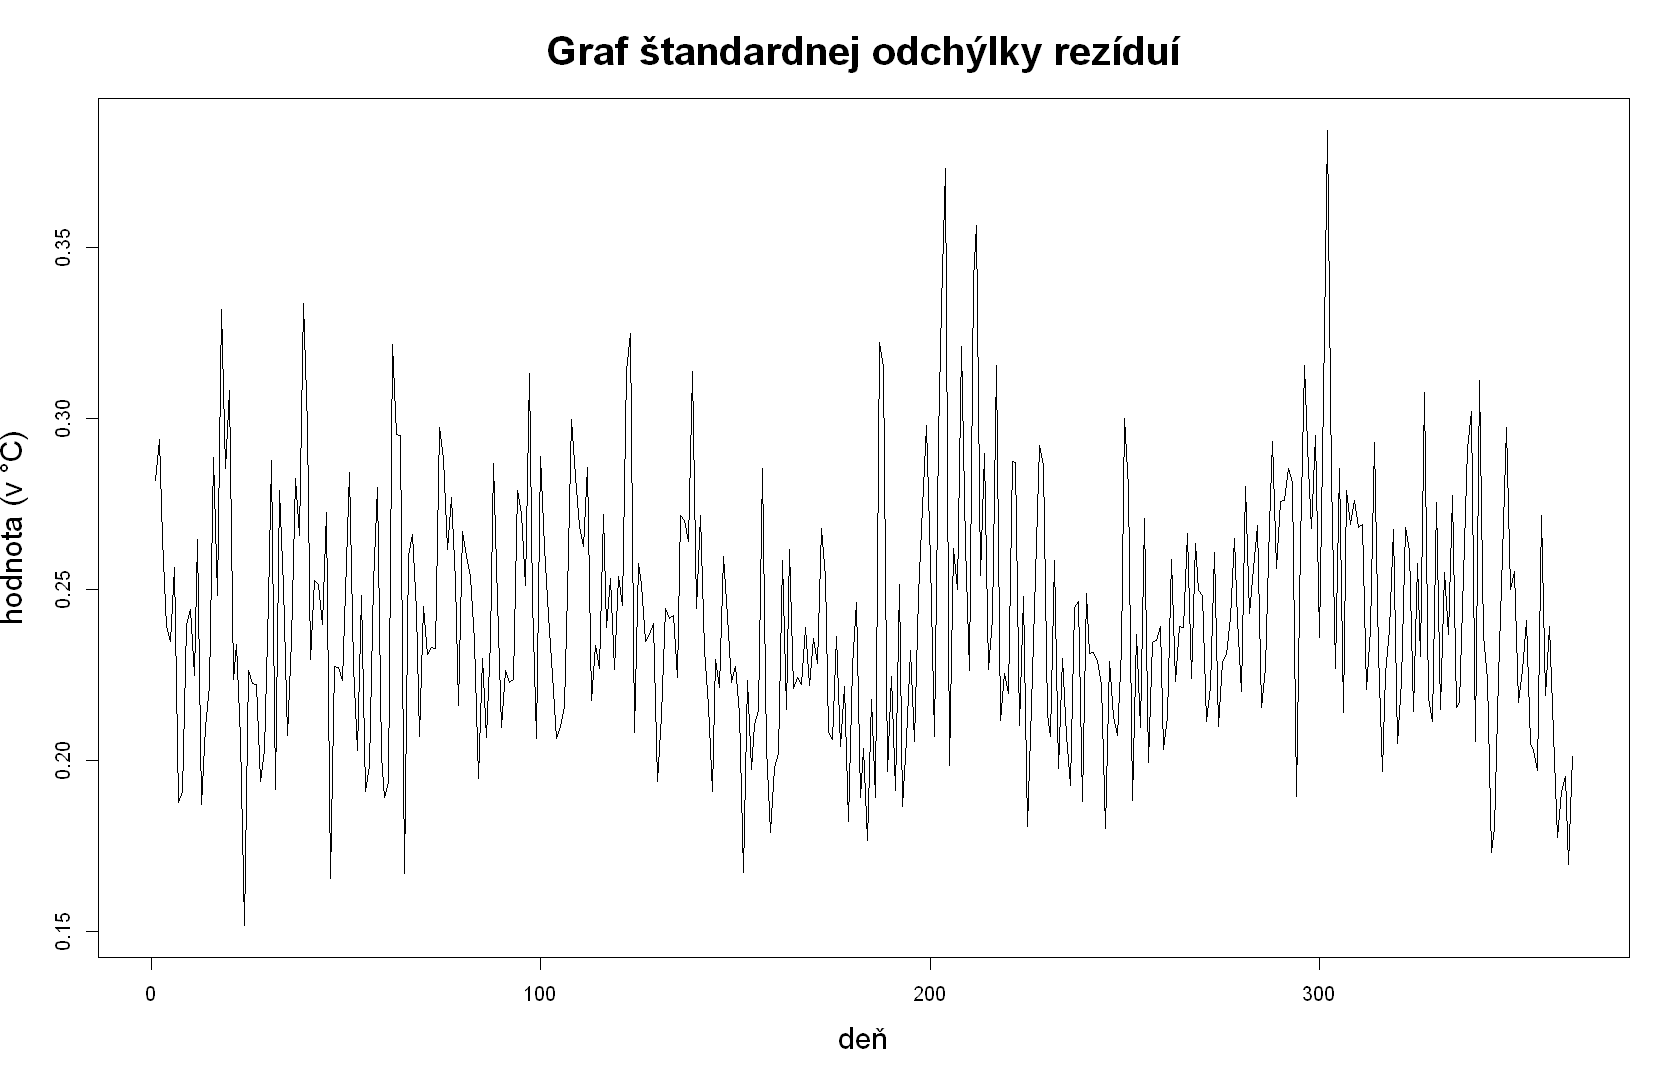

In [379]:
stddevE5 <- sqrt(diag(SigmaE5))
options(repr.plot.width=14, repr.plot.height=9)

plot( day,stddevE5, type="l", xlab="deň", ylab="hodnota (v °C)", main="Graf štandardnej odchýlky rezíduí"
     ,cex.main=2, cex.lab=1.5)

Zobrazené **rezídua** majú **nulový priemer** a ich **rozptyl** je v čase zhruba **konštantný**.

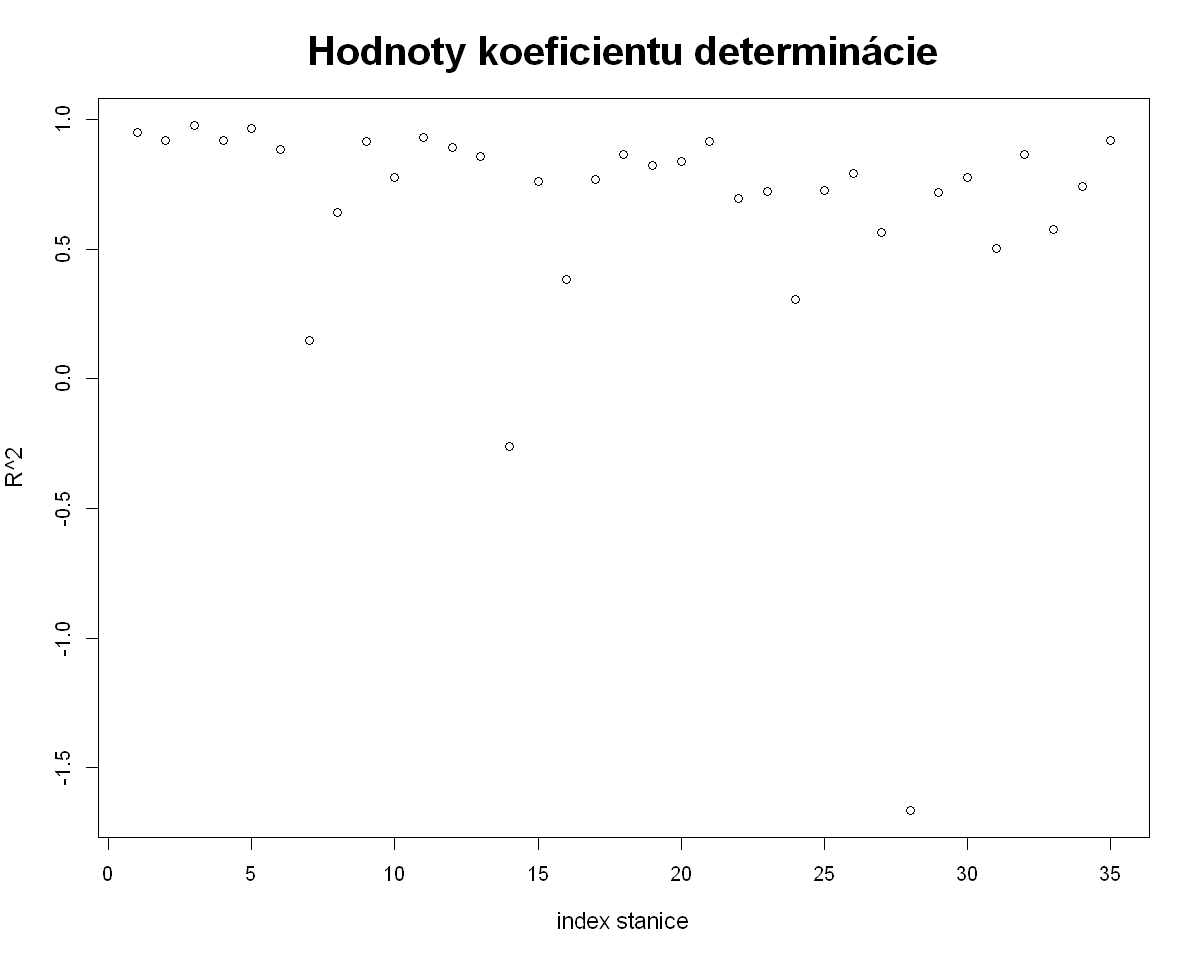

In [380]:
R2<-c()
# vyratame si koeficient determinacie modelu za cely cas, ale pre kazdu stanicu zvlast
for (i in 1:35) {
  lnpreci    <- eval.fd(logzrazky_fd[i],    day.5)
  lnprechati <- eval.fd(logzrazky_odhad[i], day.5)
  SSE <- sum((lnpreci-lnprechati)^2)
  SSY <- sum((lnpreci-logzrazky_priemer)^2)
  RSQ <- (SSY-SSE)/SSY
  R2<-c(R2,RSQ)}
options(repr.plot.width=10, repr.plot.height=8)
plot(R2, xlab="index stanice", ylab="R^2", main="Hodnoty koeficientu determinácie", cex.lab=1.15, cex.main=2)

**Koeficienty determinácie** ukazujú na **rôznorodosť** kvality modelu pre jednotlivé meteorologické stanice.

In [381]:
mshapiro.test(rezidua5)


	Multivariate Shapiro-Wilk normality test

data:  (St. Johns,Halifax,Sydney,Yarmouth,Charlottvl,Fredericton,Scheffervll,Arvida,Bagottville,Quebec,Sherbrooke,Montreal,Ottawa,Toronto,London,Thunder Bay,Winnipeg,The Pas,Churchill,Regina,Pr. Albert,Uranium City,Edmonton,Calgary,Kamloops,Vancouver,Victoria,Pr. George,Pr. Rupert,Whitehorse,Dawson,Yellowknife,Iqaluit,Inuvik,Resolute)
W = 0.87477, p-value < 2.2e-16


**Viacrozmerný Shapirov-Wilkov** test zamietol ich normalitu (p=2,2e-16). 

***
<a id=References></a>
# <font color=darkgreen> 5. Zdroje </font>

* Jeff Goldsmith, Fabian Scheipl, Lei Huang, Julia Wrobel, Chongzhi Di, Jonathan Gellar, Jaroslaw
  Harezlak, Mathew W. McLean, Bruce Swihart, Luo Xiao, Ciprian Crainiceanu and Philip T. Reiss
  (2022). refund: Regression with Functional Data. R package version 0.1-28.
  https://CRAN.R-project.org/package=refund
  
  
* J. O. Ramsay, Spencer Graves and Giles Hooker (2022). fda: Functional Data Analysis. R package
  version 6.0.5. https://CRAN.R-project.org/package=fda
  

* Kokoszka, P., & Reimherr, M. (2017). Introduction to Functional Data Analysis (1st edition). Chapman and Hall/CRC.


* Ramsay, J., Hooker, G., & Graves, S. (2009). Functional Data Analysis with R and MATLAB. Springer New York. 


* Staicu, A.-M., & Park, S. Y. (2016). Short Course on Applied Functional Data Analysis. [Online kurz.](https://www4.stat.ncsu.edu/~staicu/FDAtutorial/index.html) 


* Žežula, I. (2015). Výpočtové a simulačné metódy (1. vydanie). EQUILIBRA, s.r.o.




